# plots for paper

In [1]:
import numpy as np
import eagle_constants_and_units as c
import cosmo_utils as csu
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import mpl_toolkits.axes_grid1 as axgrid
from astropy import constants as const
from astropy import units as u

from matplotlib.patches import ConnectionPatch

import os
import get_halpha_SB

%matplotlib inline

%run 'load_data.ipynb'
%run 'add_noise.ipynb'
%run 'extract_FOV.ipynb'
%run 'mask_galaxies.ipynb'

In [24]:
machine='chinook'

### STUFF WE MUST HAVE:
slicewidth = 20.        # initial value
resolution = None      # initial value   # arcsec/pixel
distance   = '100Mpc'  # initial value
data_FOV =None  # from extract_FOV
xystarts =None  # from extract_FOV
size     =None  # from extract_FOV

data_tuple = loaddata(machine=machine, distance=distance, slicewidth=slicewidth)  ### I want this to set the resolution too


Resolution is None, finding minimum resolution of the similuation...
The resolution of the raw simulation at 100Mpc is 6.40094057981.
Loading data of slicewidth 20 (after rounding), number of slices is 4
./intermediatedata/data_100Mpc_6arcsec_20slwd.npz exists, loading now...
./intermediatedata/data_100Mpc_6arcsec_20slwd.npz was not saved as a tuple since too large, returning as tuple with 32000,1,6.40094057981 appended.
The resolution of the raw simulation at 100Mpc is 6.40094057981.
Loading data of slicewidth 20 (after rounding), number of slices is 4
./intermediatedata/data_100Mpc_50arcsec_20slwd.npz does not exist, making it now...
Data exists, loading ./intermediatedata/emission_halpha_L0100N1504_28_test2_SmAb_C2Sm_32000pix_20slice_zcen12.5_total.npz now...
Reducing the resolution to desired distance/resolution...
Will reduce resolution by a factor of 8.0.
DEBUGGING: data_tuple is: 
(array([[-2.62251306, -2.64588165, -2.67609072, ..., -2.5156002 ,
        -2.541363  , -2.58395076]

In [27]:
### For the full size plots, use low resolution data:
data_tuple_100 = loaddata(machine=machine, distance=distance, slicewidth=slicewidth, resolution=25.)  ### I want this to set the resolution too

### UNCOMMENT THIS IF YOU CAN DO LOW RESOLUTION WORK ###
#data_tuple = data_tuple_100

The resolution of the raw simulation at 100Mpc is 6.40094057981.
Loading data of slicewidth 20 (after rounding), number of slices is 4
./intermediatedata/data_100Mpc_25arcsec_20slwd.npz does not exist, making it now...
Data exists, loading ./intermediatedata/emission_halpha_L0100N1504_28_test2_SmAb_C2Sm_32000pix_20slice_zcen12.5_total.npz now...
Reducing the resolution to desired distance/resolution...
Will reduce resolution by a factor of 4.0.
DEBUGGING: data_tuple is: 
(array([[-2.6218977 , -2.63620162, -2.6473248 , ..., -2.55499244,
        -2.57775211, -2.60140967],
       [-2.60945034, -2.62291479, -2.63259029, ..., -2.54638076,
        -2.56752372, -2.58986354],
       [-2.59997177, -2.61284757, -2.62112451, ..., -2.53898215,
        -2.55939937, -2.58107328],
       ..., 
       [-2.68029618, -2.69581103, -2.70630074, ..., -2.60256505,
        -2.63226175, -2.6588757 ],
       [-2.6596868 , -2.67567301, -2.68709159, ..., -2.58369279,
        -2.61155653, -2.63788557],
       [-2

In [28]:
data = data_tuple[0]
resolution = data_tuple[3]
print data.shape
print resolution

(32000, 32000)
6.40094057981


In [13]:
FOV1_50, xystarts1_50, size1_50    = extractFOV(data_tuple,  resolution, '50Mpc', x_center = 50.5, y_center = 13.5)
FOV1_100, xystarts1_100, size1_100 = extractFOV(data_tuple,  resolution, '100Mpc', x_center = 50.5, y_center = 13.5)
FOV1_200, xystarts1_200, size1_200 = extractFOV(data_tuple,  resolution, '200Mpc', x_center = 50.5, y_center = 13.5)
FOV1_500, xystarts1_500, size1_500 = extractFOV(data_tuple,  resolution, '500Mpc', x_center = 50.5, y_center = 13.5)
FOV1_1000, xystarts1_1000, size1_1000 = extractFOV(data_tuple,  resolution, '980Mpc', x_center = 50.5, y_center = 17.5)
FOV1_1600, xystarts1_1600, size1_1600 = extractFOV(data_tuple,  resolution, '1600Mpc', x_center = 50.5, y_center = 31.5)
print FOV1_1000.shape
print xystarts1_1000

(16392, 10928)
[24.887500000000003, 0.42500000000000004]


In [29]:
FOV1_1000, xystarts1_1000, size1_1000 = extractFOV(data_tuple_100,  100., '980Mpc', x_center = 50.5, y_center = 17.5)
FOV1_1600, xystarts1_1600, size1_1600 = extractFOV(data_tuple_100,  100., '1600Mpc', x_center = 50.5, y_center = 31.5)
print FOV1_1000.shape
print xystarts1_1000

(4098, 2732)
[24.887500000000003, 0.42500000000000004]


In [15]:
def plotcutout(data,minx,miny,size):
    shape = data.shape[0]
    data_cutout = data[int(minx/100.*shape):int((minx+size)/100.*shape),int(miny/100.*shape):int((miny+size)/100.*shape)]
    return data_cutout

def plotbox(minx,miny,sizex,sizey,ax,colour='black',linewidth=1,linestyle='-'):
    ax.plot([minx,minx+sizex,minx+sizex,minx,minx],[miny,miny,miny+sizey,miny+sizey,miny],\
            linestyle=linestyle,color=colour,linewidth=linewidth)


## full simulation with FOV inset figure

The type of size is <type 'int'>
The type of size is <type 'list'>


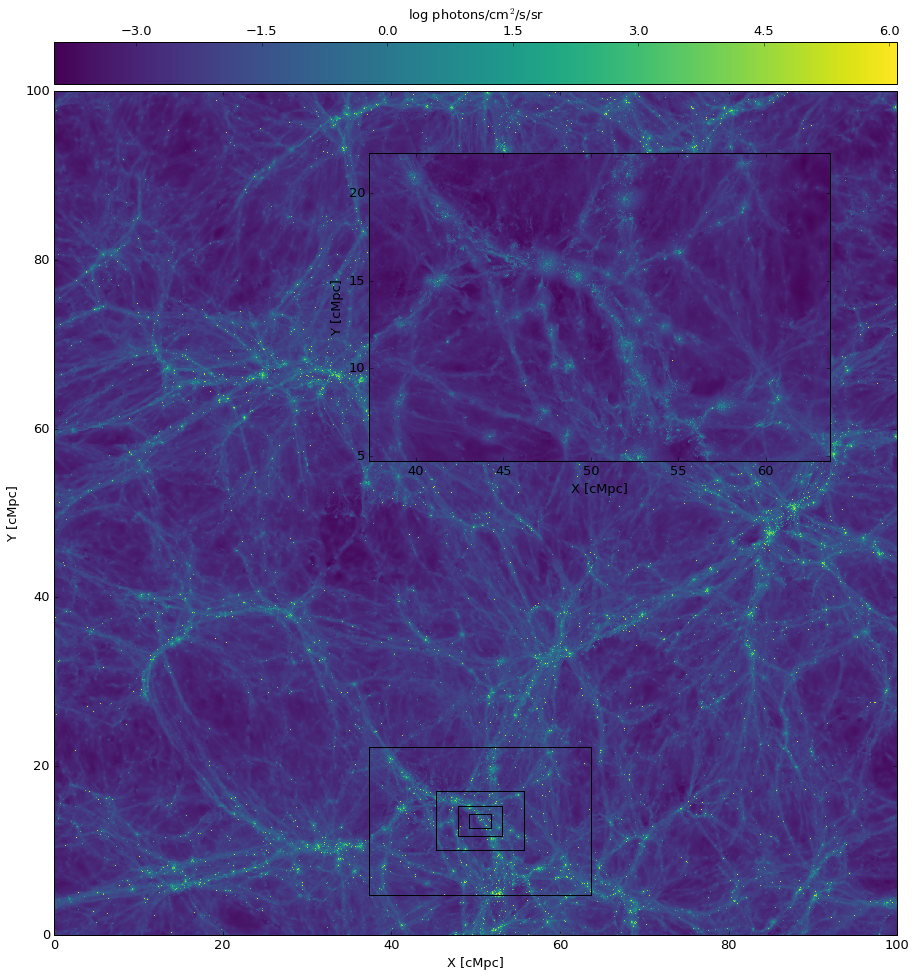

In [7]:
fig, (ax1) = plt.subplots(1, 1, figsize=(16, 16))
get_halpha_SB.makemap(data_tuple_100[0],100,ax1,xystarts = [0,0])
plotbox(xystarts1_50[0],xystarts1_50[1],size1_50[0],size1_50[1],ax1)
plotbox(xystarts1_100[0],xystarts1_100[1],size1_100[0],size1_100[1],ax1)
plotbox(xystarts1_200[0],xystarts1_200[1],size1_200[0],size1_200[1],ax1)
plotbox(xystarts1_500[0],xystarts1_500[1],size1_500[0],size1_500[1],ax1)

ax2 = fig.add_axes([0.42, 0.47, 0.40, 0.40])
get_halpha_SB.makemap(FOV1_500,size1_500,ax2,xystarts=xystarts1_500,colorbar=False)

#plt.tight_layout()

## dragonfly FOVs outlined + filament Figure

The type of size is <type 'list'>


(4.71875, 22.28125)

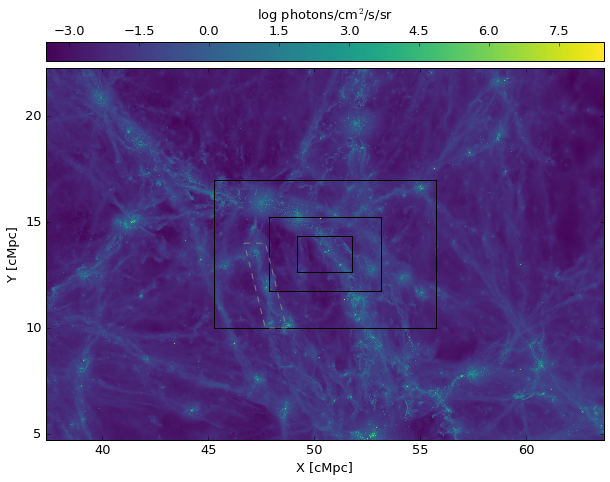

In [6]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
get_halpha_SB.makemap(FOV1_500,size1_500,ax1,xystarts = xystarts1_500)

## plot FOVs
plotbox(xystarts1_50[0],xystarts1_50[1],size1_50[0],size1_50[1],ax1)
plotbox(xystarts1_100[0],xystarts1_100[1],size1_100[0],size1_100[1],ax1)
plotbox(xystarts1_200[0],xystarts1_200[1],size1_200[0],size1_200[1],ax1)

## plot filament box
ax1.plot(np.array([46.2,47.2,48.2,47.2,46.2])+0.5,[14,14,10,10,14],color='grey',label='Region 1',linestyle='--')

ax1.set_xlim(xystarts1_500[0],xystarts1_500[0]+size1_500[0])
ax1.set_ylim(xystarts1_500[1],xystarts1_500[1]+size1_500[1])

## comparison of Dragonfly FOVs to MUSE FOVs

In [16]:
## MUSE
x_angFOV=60.;y_angFOV=60.
data_FOV_MUSE_50, xystarts_MUSE_50, size_MUSE_50 = extractFOV(data_tuple,resolution,'50Mpc',x_center=50.5,\
                                                             y_center=13.6,x_angFOV=x_angFOV,y_angFOV=y_angFOV)
data_FOV_MUSE_100, xystarts_MUSE_100, size_MUSE_100 = extractFOV(data_tuple,resolution,'100Mpc',x_center=50.5,\
                                                             y_center=13.6,x_angFOV=x_angFOV,y_angFOV=y_angFOV)
data_FOV_MUSE_200, xystarts_MUSE_200, size_MUSE_200 = extractFOV(data_tuple,resolution,'200Mpc',x_center=50.5,\
                                                             y_center=13.6,x_angFOV=x_angFOV,y_angFOV=y_angFOV)
data_FOV_MUSE_500, xystarts_MUSE_500, size_MUSE_500 = extractFOV(data_tuple,resolution,'500Mpc',x_center=50.5,\
                                                             y_center=13.6,x_angFOV=x_angFOV,y_angFOV=y_angFOV)
data_FOV_MUSE_1000, xystarts_MUSE_1000, size_MUSE_1000 = extractFOV(data_tuple,resolution,'980Mpc',x_center=50.5,\
                                                             y_center=13.6,x_angFOV=x_angFOV,y_angFOV=y_angFOV)
data_FOV_MUSE_1600, xystarts_MUSE_1600, size_MUSE_1600 = extractFOV(data_tuple,resolution,'1600Mpc',x_center=50.5,\
                                                             y_center=13.6,x_angFOV=x_angFOV,y_angFOV=y_angFOV)
print data_FOV_MUSE_1000.shape

(92, 92)


The type of size is <type 'list'>
The type of size is <type 'list'>
(50.428125, 13.671875)
(50.428125, 13.528125)


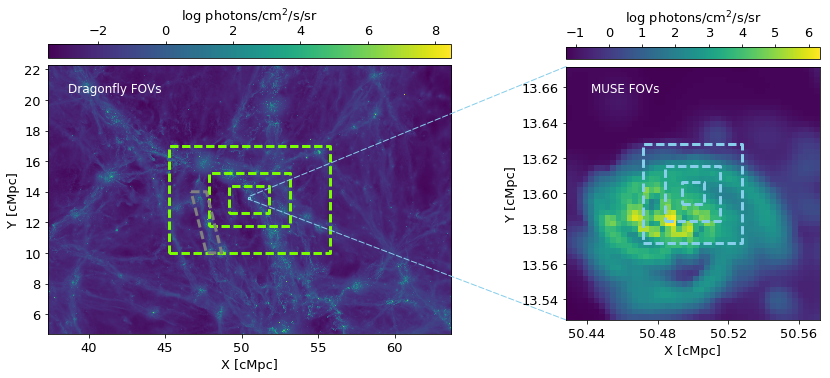

In [17]:
fig = plt.figure(figsize=(16, 16))
ax1 = fig.add_axes([0.1, 0.1, 0.35, 0.4])
ax2 = fig.add_axes([0.55, 0.17, 0.22, 0.27])

#fig, (ax2,ax1) = plt.subplots(1, 2, figsize=(10, 10))

get_halpha_SB.makemap(FOV1_500,size1_500,ax1,xystarts = xystarts1_500)
plotbox(xystarts1_50[0],xystarts1_50[1],size1_50[0],size1_50[1],ax1,colour='lawngreen',linestyle='--',linewidth=3)
plotbox(xystarts1_100[0],xystarts1_100[1],size1_100[0],size1_100[1],ax1,colour='lawngreen',linestyle='--',linewidth=3)
plotbox(xystarts1_200[0],xystarts1_200[1],size1_200[0],size1_200[1],ax1,colour='lawngreen',linestyle='--',linewidth=3)
#plotbox(xystarts1_500[0],xystarts1_500[1],size1_500[0],size1_500[1],ax1,colour='lawngreen')
ax1.plot(np.array([46.2,47.2,48.2,47.2,46.2])+0.5,[14,14,10,10,14],color='grey',label='Region 1',linestyle='--',linewidth=3)
ax1.set_xlim(xystarts1_500[0],xystarts1_500[0]+size1_500[0])
ax1.set_ylim(xystarts1_500[1],xystarts1_500[1]+size1_500[1])

plotbox(xystarts_MUSE_500[0],xystarts_MUSE_500[1],size_MUSE_500[0],size_MUSE_500[1],ax1,colour='skyblue')

get_halpha_SB.makemap(data_FOV_MUSE_500,size_MUSE_500,ax2,xystarts = xystarts_MUSE_500)
plotbox(xystarts_MUSE_50[0],xystarts_MUSE_50[1],size_MUSE_50[0],size_MUSE_50[1],ax2,colour='skyblue',linestyle='--',linewidth=3)
plotbox(xystarts_MUSE_100[0],xystarts_MUSE_100[1],size_MUSE_100[0],size_MUSE_100[1],ax2,colour='skyblue',linestyle='--',linewidth=3)
plotbox(xystarts_MUSE_200[0],xystarts_MUSE_200[1],size_MUSE_200[0],size_MUSE_200[1],ax2,colour='skyblue',linestyle='--',linewidth=3)
#plotbox(xystarts_MUSE_500[0],xystarts_MUSE_500[1],size_MUSE_500[0],size_MUSE_500[1],ax2,colour='skyblue')
ax2.set_xlim(xystarts_MUSE_500[0],xystarts_MUSE_500[0]+size_MUSE_500[0])
ax2.set_ylim(xystarts_MUSE_500[1],xystarts_MUSE_500[1]+size_MUSE_500[1])
ax2.set_xticks([50.44,50.48,50.52,50.56])
ax2.set_xticklabels(['50.44','50.48','50.52','50.56'])

xy1 = (xystarts_MUSE_500[0],xystarts_MUSE_500[1]+size_MUSE_500[1])
xy2 = (xystarts_MUSE_500[0],xystarts_MUSE_500[1])
print xy1
print xy2
con1 = ConnectionPatch(xyA=xy1, xyB=xy1, coordsA="data", coordsB="data",
                       axesA=ax2, axesB=ax1, color="skyblue",linestyle='--')
ax2.add_artist(con1)
con2 = ConnectionPatch(xyA=xy2, xyB=xy2, coordsA="data", coordsB="data",
                       axesA=ax2, axesB=ax1, color="skyblue",linestyle='--')
ax2.add_artist(con2)

ax2.text(0.1,0.9,'MUSE FOVs',transform=ax2.transAxes,color='white',fontsize=12)
ax1.text(0.05,0.9,'Dragonfly FOVs',transform=ax1.transAxes,color='white',fontsize=12)

plt.savefig('extract_FOV_and_cutout_galaxies_DragonflyMUSEcomparison.png')

In [ ]:
fig = plt.figure(figsize=(16, 16))
ax1 = fig.add_axes([0.1, 0.1, 0.35, 0.4])
ax2 = fig.add_axes([0.55, 0.17, 0.22, 0.27])

# Dragonfly FOV plot
get_halpha_SB.makemap(FOV1_1600,size1_1600,ax1,xystarts = xystarts1_1600)

plotbox(xystarts1_50[0],xystarts1_50[1],size1_50[0],size1_50[1],ax1,colour='lawngreen',linestyle='--',linewidth=3)
plotbox(xystarts1_200[0],xystarts1_200[1],size1_200[0],size1_200[1],ax1,colour='lawngreen',linestyle='--',linewidth=3)
plotbox(xystarts1_500[0],xystarts1_500[1],size1_500[0],size1_500[1],ax1,colour='lawngreen',linestyle='--',linewidth=3)

ax1.plot(np.array([46.2,47.2,48.2,47.2,46.2])+0.5,[14,14,10,10,14],color='grey',label='Region 1',linestyle='--',linewidth=3)

ax1.set_xlim(xystarts1_1600[0],xystarts1_1600[0]+size1_1600[0])
ax1.set_ylim(xystarts1_1600[1],xystarts1_1600[1]+size1_1600[1])

plotbox(xystarts_MUSE_1600[0],xystarts_MUSE_1600[1],size_MUSE_1600[0],size_MUSE_1600[1],ax1,colour='skyblue')

# MUSE FOV plot
get_halpha_SB.makemap(data_FOV_MUSE_1600,size_MUSE_1600,ax2,xystarts = xystarts_MUSE_1600)

plotbox(xystarts_MUSE_50[0],xystarts_MUSE_50[1],size_MUSE_50[0],size_MUSE_50[1],ax2,colour='skyblue',linestyle='--',linewidth=3)
plotbox(xystarts_MUSE_200[0],xystarts_MUSE_200[1],size_MUSE_200[0],size_MUSE_200[1],ax2,colour='skyblue',linestyle='--',linewidth=3)
plotbox(xystarts_MUSE_500[0],xystarts_MUSE_500[1],size_MUSE_500[0],size_MUSE_500[1],ax2,colour='skyblue',linestyle='--',linewidth=3)

ax2.set_xlim(xystarts_MUSE_1600[0],xystarts_MUSE_1600[0]+size_MUSE_1600[0])
ax2.set_ylim(xystarts_MUSE_1600[1],xystarts_MUSE_1600[1]+size_MUSE_1600[1])
#ax2.set_xticks([50.44,50.48,50.52,50.56])
#ax2.set_xticklabels(['50.44','50.48','50.52','50.56'])

xy1 = (xystarts_MUSE_1600[0],xystarts_MUSE_1600[1]+size_MUSE_1600[1])
xy2 = (xystarts_MUSE_1600[0],xystarts_MUSE_1600[1])
print xy1
print xy2
con1 = ConnectionPatch(xyA=xy1, xyB=xy1, coordsA="data", coordsB="data",
                       axesA=ax2, axesB=ax1, color="skyblue",linestyle='--',linewidth=3)
ax2.add_artist(con1)
con2 = ConnectionPatch(xyA=xy2, xyB=xy2, coordsA="data", coordsB="data",
                       axesA=ax2, axesB=ax1, color="skyblue",linestyle='--',linewidth=3)
ax2.add_artist(con2)

ax2.text(0.05,0.9,'MUSE FOVs',transform=ax2.transAxes,color='white',fontsize=12,weight='bold')
ax2.text(0.05,0.05,'H alpha',transform=ax2.transAxes,color='white',fontsize=12,weight='bold')
ax1.text(0.05,0.9,'Dragonfly FOVs',transform=ax1.transAxes,color='white',fontsize=12,weight='bold')
ax1.text(0.05,0.05,'H alpha',transform=ax1.transAxes,color='white',fontsize=12,weight='bold')

plt.savefig('extract_FOV_and_cutout_galaxies_DragonflyMUSEcomparison_large.png')

The type of size is <type 'list'>
The type of size is <type 'list'>
(50.262499999999996, 13.8375)
(50.262499999999996, 13.362499999999999)



KeyboardInterrupt



In [41]:
def thismakemap(data,size,ax,colmap='viridis',extend=None,xystarts = [0.,0.],title = '',colorbar=True,mockobs=False,labelaxes=True,label='',Vmin = None, Vmax = None):
    fontsize=13
    #xystarts = [0.,0.] # lower left origin of the plot
    
    if mockobs:
        clabel = r'log signal (photons)'
    else:
        clabel = r'log photons/cm$^2$/s/sr'
    
    if type(size) == float or type(size) == int:
        print('The type of size is '+str(type(size)))
        xsize = size
        ysize = size
    else:
        print('The type of size is '+str(type(size)))
        xsize = size[0]
        ysize = size[1]
    if labelaxes:
        ax.set_xlabel(r'X [cMpc]',fontsize=fontsize)
        ax.set_ylabel(r'Y [cMpc]',fontsize=fontsize)
        ax.tick_params(labelsize=fontsize) #,top=True,labeltop=True)
        #ax.xaxis.set_label_position('top') 
        ax.xaxis.set_label_position('bottom') 
        #ax.xaxis.tick_top()
        #ax.minorticks_on()
    else:
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])
    
    colmap = 'viridis' #'afmhot'
    ax.patch.set_facecolor(cm.get_cmap(colmap)(0.)) # sets background color to lowest color map value
    
    # nearest neighbour interpolation does not do any averaging, it just picks the nearest point and uses that as the value for a specific section in the image
    img = ax.imshow(data.T,extent=(xystarts[0],xystarts[0]+xsize,xystarts[1],xystarts[1]+ysize),origin='lower',\
                    cmap=cm.get_cmap(colmap),interpolation='nearest', vmin = Vmin, vmax=Vmax)
    
    #plt.title(label,fontsize=fontsize)
    div = axgrid.make_axes_locatable(ax)
        
    if colorbar:
        # top color bar:
        cax = div.append_axes("top",size="5%",pad=0.1)
        if extend is not None:
            cbar = plt.colorbar(img, cax=cax,orientation='horizontal', extend=extend)
        else:
            cbar = plt.colorbar(img, cax=cax,orientation='horizontal')
        cbar.ax.set_xlabel(r'%s' % (clabel), fontsize=fontsize)
        cbar.ax.xaxis.set_label_position('top')      
        cbar.ax.xaxis.set_ticks_position('top')
        cbar.solids.set_edgecolor("face")
        #cbar.ax.set_ylabel(r'%s' % (clabel), fontsize=fontsize)
        cbar.ax.tick_params(labelsize=fontsize)

    font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 12,
        }
    


The type of size is <type 'list'>
The type of size is <type 'list'>
(50.35625, 13.743749999999999)
(50.35625, 13.45625)


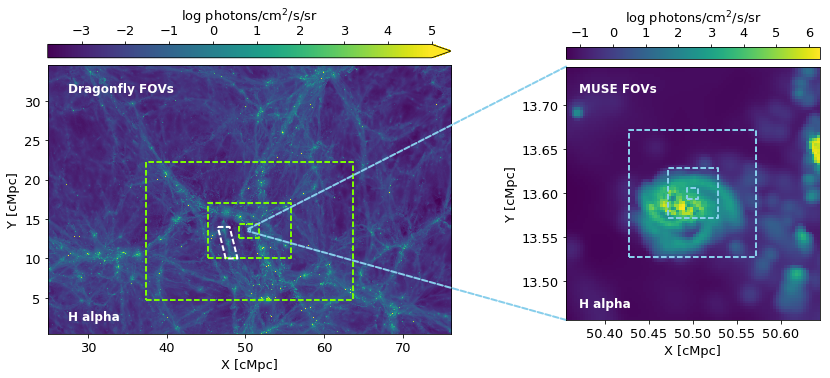

In [35]:
fig = plt.figure(figsize=(16, 16))
ax1 = fig.add_axes([0.1, 0.1, 0.35, 0.4])
ax2 = fig.add_axes([0.55, 0.17, 0.22, 0.27])

# General properties
linewidth = 2
fontweight = 'bold'

# Dragonfly FOV plot
thismakemap(FOV1_1000,size1_1000,ax1,xystarts = xystarts1_1000,extend='max',Vmax=5.0)

plotbox(xystarts1_50[0],xystarts1_50[1],size1_50[0],size1_50[1],ax1,colour='lawngreen',linestyle='--',linewidth=linewidth)
plotbox(xystarts1_200[0],xystarts1_200[1],size1_200[0],size1_200[1],ax1,colour='lawngreen',linestyle='--',linewidth=linewidth)
plotbox(xystarts1_500[0],xystarts1_500[1],size1_500[0],size1_500[1],ax1,colour='lawngreen',linestyle='--',linewidth=linewidth)

#ax1.plot(np.array([46.2,47.2,48.2,47.2,46.2])+0.5,[14,14,10,10,14],color='white',label='Region 1',linestyle='--',linewidth=linewidth)
#ax1.plot(np.array([46.1,47.3,48.3,47.1,46.1])+0.5,[14,14,10,10,14],color='white',label='Region 1',linestyle='--',linewidth=linewidth)
ax1.plot(np.array([46.,47.5,48.5,47.,46.])+0.5,[14,14,10,10,14],color='white',label='Region 1',linestyle='--',linewidth=linewidth)

#ax1.set_xlim(xystarts1_1000[0],xystarts1_1000[0]+size1_1000[0])
#ax1.set_ylim(xystarts1_1000[1],xystarts1_1000[1]+size1_1000[1])

plotbox(xystarts_MUSE_1000[0],xystarts_MUSE_1000[1],size_MUSE_1000[0],size_MUSE_1000[1],ax1,colour='skyblue')

# MUSE FOV plot
thismakemap(data_FOV_MUSE_1000,size_MUSE_1000,ax2,xystarts = xystarts_MUSE_1000)

plotbox(xystarts_MUSE_50[0],xystarts_MUSE_50[1],size_MUSE_50[0],size_MUSE_50[1],ax2,colour='skyblue',linestyle='--',linewidth=linewidth)
plotbox(xystarts_MUSE_200[0],xystarts_MUSE_200[1],size_MUSE_200[0],size_MUSE_200[1],ax2,colour='skyblue',linestyle='--',linewidth=linewidth)
plotbox(xystarts_MUSE_500[0],xystarts_MUSE_500[1],size_MUSE_500[0],size_MUSE_500[1],ax2,colour='skyblue',linestyle='--',linewidth=linewidth)

ax2.set_xlim(xystarts_MUSE_1000[0],xystarts_MUSE_1000[0]+size_MUSE_1000[0])
ax2.set_ylim(xystarts_MUSE_1000[1],xystarts_MUSE_1000[1]+size_MUSE_1000[1])
#ax2.set_xticks([50.44,50.48,50.52,50.56])
#ax2.set_xticklabels(['50.44','50.48','50.52','50.56'])

xy1 = (xystarts_MUSE_1000[0],xystarts_MUSE_1000[1]+size_MUSE_1000[1])
xy2 = (xystarts_MUSE_1000[0],xystarts_MUSE_1000[1])
print xy1
print xy2
con1 = ConnectionPatch(xyA=xy1, xyB=xy1, coordsA="data", coordsB="data",
                       axesA=ax2, axesB=ax1, color="skyblue",linestyle='--',linewidth=linewidth)
ax2.add_artist(con1)
con2 = ConnectionPatch(xyA=xy2, xyB=xy2, coordsA="data", coordsB="data",
                       axesA=ax2, axesB=ax1, color="skyblue",linestyle='--',linewidth=linewidth)
ax2.add_artist(con2)

ax2.text(0.05,0.9,'MUSE FOVs',transform=ax2.transAxes,color='white',fontsize=12,fontweight=fontweight)
ax2.text(0.05,0.05,'H alpha',transform=ax2.transAxes,color='white',fontsize=12,fontweight=fontweight)
ax1.text(0.05,0.9,'Dragonfly FOVs',transform=ax1.transAxes,color='white',fontsize=12,fontweight=fontweight)
ax1.text(0.05,0.05,'H alpha',transform=ax1.transAxes,color='white',fontsize=12,fontweight=fontweight)

plt.savefig('extract_FOV_and_cutout_galaxies_DragonflyMUSEcomparison_large_1000Mpc.png')

## dragonfly full simulation + FOV figure on the side + filament

The type of size is <type 'int'>


TypeError: pltimg() got an unexpected keyword argument 'colorbar'

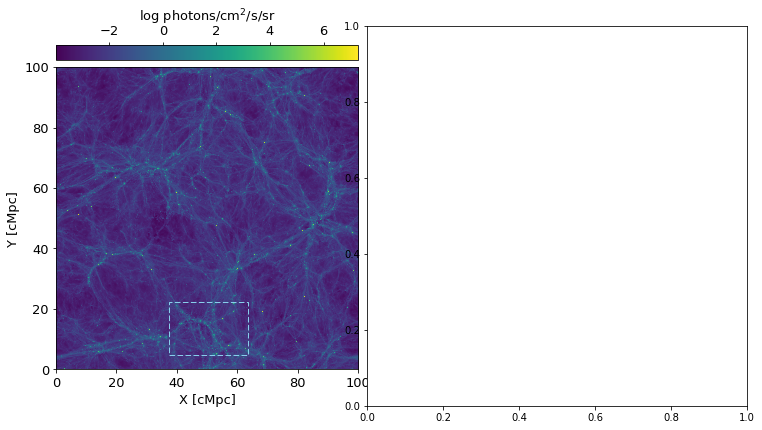

In [36]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_axes([0.1, 0.1, 0.35, 0.4])

get_halpha_SB.makemap(data_tuple_100[0],100,ax1,xystarts = [0,0])
plotbox(xystarts1_500[0],xystarts1_500[1],size1_500[0],size1_500[1],ax1,linestyle='--',\
       colour='skyblue')

ax2 = fig.add_axes([0.46, 0.07, 0.44, 0.44])
pltimg(FOV1_500,ax2,xystarts1_500,size1_500,colorbar=False,labelaxes=True,ylabelside='right')
## plot FOVs
plotbox(xystarts1_50[0],xystarts1_50[1],size1_50[0],size1_50[1],ax2,linestyle='--',\
       colour='skyblue')
plotbox(xystarts1_100[0],xystarts1_100[1],size1_100[0],size1_100[1],ax2,linestyle='--',\
       colour='skyblue')
plotbox(xystarts1_200[0],xystarts1_200[1],size1_200[0],size1_200[1],ax2,linestyle='--',\
       colour='skyblue')
plotbox(xystarts1_500[0]+0.05,xystarts1_500[1]+0.07,size1_500[0]-0.1,size1_500[1]-0.1,\
        ax2,linestyle='--',linewidth=3,colour='skyblue')
ax2.set_xlim(xystarts1_500[0],xystarts1_500[0]+size1_500[0])
ax2.set_ylim(xystarts1_500[1],xystarts1_500[1]+size1_500[1])
## plot filament box
ax2.plot(np.array([46.2,47.2,48.2,47.2,46.2])+0.5,[14,14,10,10,14],color='lawngreen',label='Region 1',linestyle='--',linewidth=1)

xy1 = (xystarts1_500[0],xystarts1_500[1]+size1_500[1])
xy2 = (xystarts1_500[0]+size1_500[0],xystarts1_500[1])
print xy1
print xy2
con1 = ConnectionPatch(xyA=xy1, xyB=xy1, coordsA="data", coordsB="data",
                       axesA=ax2, axesB=ax1, color="skyblue",linestyle='--')
ax2.add_artist(con1)
con2 = ConnectionPatch(xyA=xy2, xyB=xy2, coordsA="data", coordsB="data",
                       axesA=ax2, axesB=ax1, color="skyblue",linestyle='--')
ax2.add_artist(con2)
#ax2.set_axis_off()

plt.savefig('extract_FOV_and_cutout_galaxies_fullsimFOVs.png')

## dragonfly 50 Mpc FOV with galaxy cutouts Figure

In [42]:
def makemap(data,size,ax,Vmin = None,Vmax = None,colmap='viridis',xystarts = [0.,0.],title = '',colorbar=True,mockobs=False,labelaxes=True,label=''):
    fontsize=13
    #xystarts = [0.,0.] # lower left origin of the plot
    
    if mockobs:
        clabel = r'log signal (photons)'
    else:
        clabel = r'log photons/cm$^2$/s/sr'
    
    if type(size) == float or type(size) == int:
        print('The type of size is '+str(type(size)))
        xsize = size
        ysize = size
    else:
        print('The type of size is '+str(type(size)))
        xsize = size[0]
        ysize = size[1]
    
    #fig = plt.figure(figsize = (5.5, 5.)) # large size just as a trick to get higher resolution
    #fig = plt.figure(figsize = (11., 10.))
    
    if labelaxes:
        ax.set_xlabel(r'X [cMpc]',fontsize=fontsize)
        ax.set_ylabel(r'Y [cMpc]',fontsize=fontsize)
        ax.tick_params(labelsize=fontsize) #,top=True,labeltop=True)
        ax.xaxis.set_label_position('bottom') 
    else:
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])
    
    colmap = 'viridis' #'afmhot'
    ax.patch.set_facecolor(cm.get_cmap(colmap)(0.)) # sets background color to lowest color map value
    
    # nearest neighbour interpolation does not do any averaging, it just picks the nearest point and uses that as the value for a specific section in the image
    img = ax.imshow(data.T,extent=(xystarts[0],xystarts[0]+xsize,xystarts[1],xystarts[1]+ysize),origin='lower', \
                    cmap=cm.get_cmap(colmap),interpolation='nearest', vmin = Vmin, vmax=Vmax)
    
    #plt.title(label,fontsize=fontsize)
    div = axgrid.make_axes_locatable(ax)
        
    if colorbar:
        cax = div.append_axes("top",size="5%",pad=0.1)
        cbar = plt.colorbar(img, cax=cax,orientation='horizontal')

        cbar.ax.set_xlabel(r'%s' % (clabel), fontsize=fontsize)
        cbar.ax.xaxis.set_label_position('top')      
        cbar.ax.xaxis.set_ticks_position('top')
        cbar.solids.set_edgecolor("face")
        #cbar.ax.set_ylabel(r'%s' % (clabel), fontsize=fontsize)
        cbar.ax.tick_params(labelsize=fontsize)
    
    font = {'family': 'serif',
        'color':  'yellow',
        'weight': 'bold',
        'size': 12,
        }
    
    font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 12,
        }


def plotgalboxes(xgal,ygal,rhgas,rhstar,mgal,ax1,boxsize=0.4,linestyle='-',linewidth=1):
    for i in range(len(xgal)):
        if mgal[i]>10**9:
            minx,miny,sizex,sizey = xgal[i]-boxsize/2.,ygal[i]-boxsize/2.,boxsize,boxsize
            plotbox(minx,miny,sizex,sizey,ax1,colour='grey',linestyle=linestyle,linewidth=linewidth)

def pltimg(data_FOV,ax,xystarts,size,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,ylabelside='left',Vmin=-4.5,Vmax=8):
    ax.patch.set_facecolor(cm.get_cmap(colmap)(0.)) # sets background color to lowest color map value
    img = ax.imshow(data_FOV.T,extent=(xystarts[0],xystarts[0]+size[0],xystarts[1],xystarts[1]+size[1]),\
                    origin='lower', cmap=cm.get_cmap(colmap),interpolation='nearest',vmin=Vmin,vmax=Vmax)
    if labelaxes:
        fontsize=13
        ax.set_xlabel(r'X [cMpc]',fontsize=fontsize)
        ax.set_ylabel(r'Y [cMpc]',fontsize=fontsize)
        ax.locator_params(axis='y', nticks=3)
        ax.tick_params(labelsize=fontsize) #,top=True,labeltop=True)
        ax.xaxis.set_label_position('top') 
        ax.xaxis.tick_top()
        if ylabelside=='right':
            ax.yaxis.tick_right()
            ax.yaxis.set_label_position('right')
    else:
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])
    if colorbar:
        div = axgrid.make_axes_locatable(ax)
        cax = div.append_axes("top",size="5%",pad=0.1)
        cbar = plt.colorbar(img, cax=cax,orientation='horizontal')
    if label is not None:
        ax.text(0.0,0.9,label,transform=ax.transAxes,color='white',fontsize=9)

def putinbounds(xy):
    x,y = xy
    if x>xystarts1_50[0]+size1_50[0]:
        print 'setting x (%s) to %s since too large'%(x,xystarts1_50[0]+size1_50[0])
        x = xystarts1_50[0]+size1_50[0]
    if x<xystarts1_50[0]:
        print 'setting x (%s) to %s since too small'%(x,xystarts1_50[0])
        x = xystarts1_50[0]
    if y>xystarts1_50[1]+size1_50[1]:
        print 'setting y (%s) to %s since too large'%(y,xystarts1_50[1]+size1_50[1])
        y = xystarts1_50[1]+size1_50[1]
    if y<xystarts1_50[1]:
        print 'setting y (%s) to %s since too small'%(y,xystarts1_50[1]+size1_50[1])
        y = xystarts1_50[1]
    return (x,y)

In [37]:
### grab out the galaxies inside this FOV
xmin,xmax,ymin,ymax,zmin,zmax = xystarts1_50[0],xystarts1_50[0]+size1_50[0],xystarts1_50[1],xystarts1_50[1]+size1_50[1],10.,15.
#xgal_50,ygal_50,zgal_50,mgal_50,rhgas_50,rhstar_50,R200 = searchgals(xmin,xmax,ymin,ymax,zmin,zmax,False,False) # from mask_galaxies
xgal_50,ygal_50,zgal_50,mgal_50,rhgas_50,rhstar_50,gn_50,sgn_50,galID_50 = searchgals(xmin,xmax,ymin,ymax,zmin,zmax,False,False,groupnumbers=True) # from mask_galaxies

## grab the more massive galaxies
Mpcperpix = 0.477/1000.*(1.+0.0235) * resolution         # at 100 Mpc from us
condition_9andup = np.array( (mgal_50 > 10**9) & (rhstar_50*5. > (Mpcperpix*1000.)) & (rhgas_50*5. > (Mpcperpix*1000.)) )
ii_9andup = np.array(np.where(condition_9andup)[0]) 
xgal_9andup     = np.array(xgal_50[ii_9andup])
ygal_9andup     = np.array(ygal_50[ii_9andup])
zgal_9andup     = np.array(zgal_50[ii_9andup])
mgal_9andup     = np.array(mgal_50[ii_9andup])
rhstar_9andup   = np.array(rhstar_50[ii_9andup])
rhgas_9andup    = np.array(rhgas_50[ii_9andup])
gn_9andup       = np.array(gn_50[ii_9andup])
sgn_9andup      = np.array(sgn_50[ii_9andup])
galID_9andup      = np.array(galID_50[ii_9andup])

print len(xgal_9andup)
# sort by position
sortedindices = np.argsort(xgal_9andup) # np.flipud(...)
xgal_9andup     = xgal_9andup[sortedindices]
ygal_9andup     = ygal_9andup[sortedindices]
zgal_9andup     = zgal_9andup[sortedindices]
mgal_9andup     = mgal_9andup[sortedindices]
rhstar_9andup   = rhstar_9andup[sortedindices]
rhgas_9andup    = rhgas_9andup[sortedindices]
gn_9andup       = gn_9andup[sortedindices]
sgn_9andup      = sgn_9andup[sortedindices]
galID_9andup    = galID_9andup[sortedindices]

6


### Using the GalIDs, reread the info for the positions and velocities from the catalogue (since crashes when try to read too many things from the catalogue so couldn't do it right away)

In [38]:
def getgalvels(galID,mySim = 'RefL0100N1504',debug=False):
    
    con   = sql.connect("dlokhorst",password="mxdPB54Y")  

    myQuery  = "SELECT \
                    SH.GalaxyID, \
                    SH.SubGroupNumber, \
                    SH.GroupNumber, \
                    SH.CentreOfPotential_x, \
                    SH.CentreOfPotential_y, \
                    SH.CentreOfPotential_z, \
                    SH.Velocity_x, \
                    SH.Velocity_y, \
                    SH.Velocity_z \
            FROM \
                %s_SubHalo as SH \
            WHERE \
                SH.SnapNum = 28 and \
                SH.GalaxyID = %s"%(mySim,galID)
 

                #  and \
              #  SH.StarFormationRate > 0.00001 
    if debug:
        print myQuery
    
    myData = sql.execute_query(con,myQuery)
        
    galID  = myData['GalaxyID']
    gn     = myData['GroupNumber']
    sgn     = myData['SubGroupNumber']
    xgal = myData['CentreOfPotential_x']  # cMpc
    ygal = myData['CentreOfPotential_y']   # cMpc
    zgal = myData['CentreOfPotential_z']      # cMpc
    vxgal  = myData['Velocity_x'] # pkpc
    vygal  = myData['Velocity_y'] # pkpc
    vzgal  = myData['Velocity_z'] # pkpc
    
    return galID,gn,sgn,xgal,ygal,zgal,vxgal,vygal,vzgal


In [41]:
with open("extract_FOV_and_cutout_galaxies_COPs.txt", "w") as text_file:
    text_file.write("galID, gn, subgn, x, y, z, vx, vy, vz\n")
    for galID in galID_9andup:
        galID_match,gn_match,sgn_match,xgal_match,ygal_match,zgal_match,vxgal_match,vygal_match,vzgal_match = getgalvels(galID,mySim = 'RefL0100N1504')
        print galID_match,gn_match,sgn_match,xgal_match,ygal_match,zgal_match,vxgal_match,vygal_match,vzgal_match
        text_file.write("%s, %s, %s, %s, %s, %s, %s, %s, %s\n"%(galID_match,gn_match,sgn_match,\
                                                                xgal_match,ygal_match,zgal_match,\
                                                                vxgal_match,vygal_match,vzgal_match))
    for gn, sgn, x, y, z in zip(gn_9andup,sgn_9andup,xgal_9andup,ygal_9andup,zgal_9andup):
        print("%s, %s, %s, %s, %s\n"%(gn,sgn,x,y,z))

13738373 134 1 50.0543327332 14.3326339722 11.5063114166 -185.157424927 -219.539093018 25.2807445526
13552548 7631 0 50.2796440125 13.9161596298 11.1202640533 -98.7809524536 64.9828720093 472.819396973
11911337 4067 0 50.4869918823 13.5846481323 12.3390817642 -81.2321090698 43.9984779358 362.303588867
17647764 718 0 50.6496925354 13.6481962204 13.0192470551 -24.9452381134 -195.142959595 131.791793823
9958488 1801 0 51.2028465271 12.965212822 13.6717453003 -43.2850875854 -199.545211792 100.731079102
13566041 7701 0 51.2168502808 14.3266563416 13.995010376 -16.8092041016 -294.485870361 66.829208374
134, 1, 50.0543, 14.3326, 11.5063

7631, 0, 50.2796, 13.9162, 11.1203

4067, 0, 50.487, 13.5846, 12.3391

718, 0, 50.6497, 13.6482, 13.0192

1801, 0, 51.2028, 12.9652, 13.6717

7701, 0, 51.2169, 14.3267, 13.995



In [18]:
## print 'GN: %s, SGN: %s, x: %s, y: %s, z: %s, vx: %s, vy: %s, vz: %s' %(gnum,sgnum,x,y,z,vx,vy,vz)
#with open("extract_FOV_and_cutout_galaxies_COPs.txt", "w") as text_file:
#    text_file.write("gn, subgn, x, y, z\n")
#    for gn, sgn, x, y, z in zip(gn_9andup,sgn_9andup,xgal_9andup,ygal_9andup,zgal_9andup):
#        text_file.write("%s, %s, %s, %s, %s\n"%(gn,sgn,x,y,z)#)

In [39]:
data = data_tuple[0]; xsize = data.shape[0]; ysize = data.shape[1]
print data.shape
boxsize = 0.2

(32000, 32000)


The type of size is <type 'list'>


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:37: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(64, 64)
setting y (14.4326339722) to 14.3625 since too large
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
setting y (14.4266563416) to 14.3625 since too large


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:82: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1766 but corresponding boolean dimension is 1765
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:85: RuntimeWarning: divide by zero encountered in log10


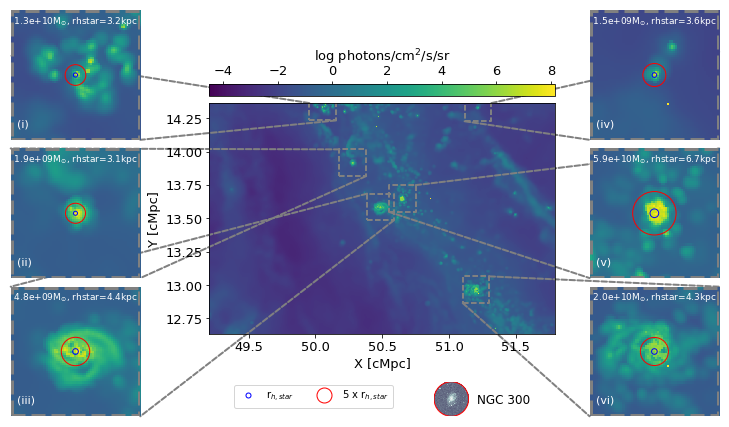

In [43]:
# rect [left, bottom, width, height]
# fig.add_axes(rect)
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_axes([0.37, 0.12, 0.40, 0.5])

Vmin=-2;Vmax=4
Vmin=-4.5;Vmax=None

#### plot main map
makemap(FOV1_50,size1_50,ax1,xystarts = xystarts1_50,Vmin=Vmin,Vmax=Vmax)

axessize = 0.15
axesbottom = 0.13
spacing = 0.16
axesleft = 0.14 #0.1
axesright= 0.81 #0.85
ax2 = fig.add_axes([axesleft, axesbottom+2*spacing, axessize, axessize])
ax3 = fig.add_axes([axesleft, axesbottom+spacing, axessize, axessize])
ax4 = fig.add_axes([axesleft, axesbottom, axessize, axessize])

ax7 = fig.add_axes([axesright, axesbottom+2*spacing, axessize, axessize])
ax5 = fig.add_axes([axesright, axesbottom+spacing, axessize, axessize])
ax6 = fig.add_axes([axesright, axesbottom, axessize, axessize])

ax8 = fig.add_axes([0.63, axesbottom, 0.04, 0.04])

ax1.set_xlim(xystarts1_50[0],xystarts1_50[0]+size1_50[0])
ax1.set_ylim(xystarts1_50[1],xystarts1_50[1]+size1_50[1])

#### plot boxes around large galaxies
plotgalboxes(xgal_50,ygal_50,rhgas_50,rhstar_50,mgal_50,ax1,boxsize=boxsize,linestyle='--',linewidth=2)
nums=['(i)','(ii)','(iii)','(v)','(vi)','(iv)']
#### plot cutouts of the more massive galaxies inside this FOV
for j,ax in zip(range(6),[ax2,ax3,ax4,ax5,ax6,ax7]):
    minx,miny,maxx,maxy = xgal_9andup[j]-boxsize/2.,ygal_9andup[j]-boxsize/2.,xgal_9andup[j]+boxsize/2.,ygal_9andup[j]+boxsize/2.
    xystarts_tiny=[minx,miny]; size_tiny=[boxsize,boxsize] 
    data_tiny=data[minx*xsize/100.:maxx*xsize/100.,miny*ysize/100.:maxy*ysize/100.]
    
    pltimg(data_tiny,ax,xystarts_tiny,size_tiny,colorbar=False,labelaxes=False,Vmin=Vmin,Vmax=Vmax,\
           label=r' %.1eM$_{\odot}$, rhstar=%.1fkpc'%((mgal_9andup[j]),rhstar_9andup[j]))
    print data_tiny.shape
    ax.text(0.05,0.1,nums[j],transform=ax.transAxes,color='white',fontsize=11)
    
    ax.set_xlim(minx,maxx)
    ax.set_ylim(miny,maxy)
    ax.set_axis_off()
    
    circle1 = plt.Circle((xgal_9andup[j],ygal_9andup[j]), \
                         radius=rhstar_9andup[j]/1000., color='blue',fill=False)
    ax.add_artist(circle1)
    
    circle1 = plt.Circle((xgal_9andup[j],ygal_9andup[j]), \
                         radius=rhstar_9andup[j]/1000.*5., color='red',fill=False)
    ax.add_artist(circle1)
    
    xy1=(maxx,miny)
    xy2=(minx,maxy)
    if (ax==ax5) or (ax==ax6) or (ax==ax7):
        xy1=(minx,miny)
        xy2=(maxx,maxy)
    xy1 = putinbounds(xy1)
    xy2 = putinbounds(xy2)

    con1 = ConnectionPatch(xyA=xy1, xyB=xy1, coordsA="data", coordsB="data",
                           axesA=ax1, axesB=ax, color="grey",linestyle='--',linewidth=2)
    con2 = ConnectionPatch(xyA=xy2, xyB=xy2, coordsA="data", coordsB="data",
                           axesA=ax1, axesB=ax, color="grey",linestyle='--',linewidth=2)
    ax1.add_artist(con1)
    ax1.add_artist(con2)
    
    plotbox(minx,miny,boxsize,boxsize,ax,colour='grey',linewidth=5,linestyle='--')
    
    
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color='w', label=r'r$_{h,star}$',
                          markerfacecolor='w', markeredgecolor='blue',markersize=5,markeredgewidth=1),
                   Line2D([0], [0], marker='o', color='w', label=r'5 x r$_{h,star}$',
                          markerfacecolor='w', markeredgecolor='red',markersize=15,markeredgewidth=1)]
ax1.legend(handles=legend_elements,loc='upper center', bbox_to_anchor=(0.3, -0.2), \
           ncol=5,numpoints=1)#,frameon=False)

## add inset picture of NGC300
ngc300 = fits.getdata('dss.00.54.53.5-37.41.03.8.fits')
piecemask = skimagemorphology.disk(ngc300.shape[0]/2 - 1)
ngc300[piecemask==0]=0
xystarts = [-25,-25]; size = [50,50]; colmap='bone'
ax8.patch.set_facecolor('white') # sets background color to lowest color map value
img = ax8.imshow(np.log10(ngc300).T,extent=(xystarts[0],xystarts[0]+size[0],\
                                                    xystarts[1],xystarts[1]+size[1]),\
                origin='lower', cmap=cm.get_cmap(colmap),interpolation='nearest')
ax8.set_yticklabels([])
ax8.set_xticklabels([])
ax8.set_xticks([])
ax8.set_yticks([])
ax8.set_axis_off()
circle1 = plt.Circle((0,0),radius=5, color='blue',fill=False)
#ax8.add_artist(circle1)
circle1 = plt.Circle((0,0),radius=25, color='red',fill=False)
ax8.add_artist(circle1)
#ax8.text(1.0,0.5,'NGC 300',transform=ax.transAxes,color='black',fontsize=13)
plt.gcf().text(0.68, 0.145, 'NGC 300', fontsize=12)

plt.savefig('extract_FOV_and_cutout_galaxies_FOVwithgalaxies_NGCinsetnoblue.png')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


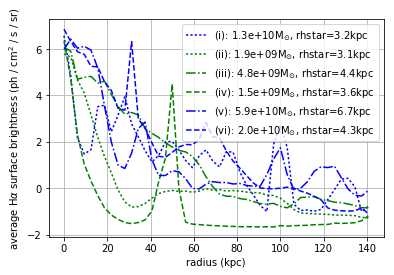

In [44]:
def radial_profile(data, center):
    data = 10**data
    y, x = np.indices((data.shape))
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    r = r.astype(np.int)

    tbin = np.bincount(r.ravel(), data.ravel())  ## radial profile before dividing by num of data points
    nr = np.bincount(r.ravel())                  ## num of data points
    radialprofile = tbin / nr
    return np.log10(radialprofile )

Mpcperpix = 0.477/1000.*(1.+0.0235) * resolution         # at 100 Mpc from us
kpcperpix = 0.477/1000.*(1.+0.0235) * resolution * 1000. # at 100 Mpc from us
nums=['(i)','(ii)','(iii)','(v)','(vi)','(iv)']
#num=['(i)','(ii)','(iii)','(iv)','(v)','(vi)']
linestyles=[':',':','-.','--','-.','--']
colours=['blue','green','green','green','blue','blue']
for j,linestyle,colour in zip([0,1,2,5,3,4],linestyles,colours):
    minx,miny,maxx,maxy = xgal_9andup[j]-boxsize/2.,ygal_9andup[j]-boxsize/2.,xgal_9andup[j]+boxsize/2.,ygal_9andup[j]+boxsize/2.
    xystarts_tiny=[minx,miny]; size_tiny=[boxsize,boxsize] 
    data_tiny=data[minx*xsize/100.:maxx*xsize/100.,miny*ysize/100.:maxy*ysize/100.]
    
    center, radi = (data_tiny.shape[0]/2,data_tiny.shape[1]/2), 55
    rad = radial_profile(data_tiny, center)

    label=r'%s: %.1eM$_{\odot}$, rhstar=%.1fkpc'%(nums[j],mgal_9andup[j],rhstar_9andup[j])
  #  label='%s'%nums[j]
    plt.plot(np.arange(len(rad))*kpcperpix,rad,label=label,color=colour,linestyle=linestyle)
    
plt.xlabel('radius (kpc)')    
# Add profile from van de Voort
# Add observed profile from literature
plt.ylabel(r'average H$\alpha$ surface brightness (ph / cm$^2$ / s / sr)')

plt.legend()
plt.grid()
plt.savefig('extract_FOV_and_cutout_galaxies_individualhalphaprofiles.png')

In [45]:
#%run 'mask_galaxies.ipynb'

verbose = True

import eagleSqlTools as sql
  
mySim = ('RefL0100N1504',100.)
con   = sql.connect("dlokhorst",password="mxdPB54Y")  

myQuery  =  " SELECT \
                SH.StarFormationRate as SFR, \
                SH.CentreOfPotential_x as sh_x , \
                SH.CentreOfPotential_y as sh_y , \
                SH.CentreOfPotential_z as sh_z , \
                SH.SubGroupNumber, \
                SH.HalfMassProjRad_Gas, \
                SH.HalfMassProjRad_Star, \
                FOF.Group_R_Crit200 as R200, \
                FOF.Group_R_TopHat200 as RTopHat, \
                FOF.Group_M_Crit200 as M200, \
                FOF.Group_M_TopHat200 as MTopHat, \
                FOF.GroupCentreOfPotential_x as fof_x , \
                FOF.GroupCentreOfPotential_y as fof_y , \
                FOF.GroupCentreOfPotential_z as fof_z , \
                SH.MassType_Star as mstar , \
                FOF.GroupMass as fof_mass , \
                square(SH.CentreOfPotential_x -FOF.GroupCentreOfPotential_x) + \
                    square(SH.CentreOfPotential_y -FOF.GroupCentreOfPotential_y) + \
                    square(SH.CentreOfPotential_z -FOF.GroupCentreOfPotential_z) as dist \
            FROM \
                RefL0100N1504_Subhalo as SH, \
                RefL0100N1504_FOF as FOF \
            WHERE \
                SH.MassType_Star > 1.0e9\
                and SH.SnapNum = 28 \
                and SH.CentreOfPotential_z >= 10 \
                and SH.CentreOfPotential_z <= 15 \
                and FOF.SnapNum = SH.SnapNum \
                and FOF.GroupID = SH.GroupID"

## NOTE:  I had to shorten the query down to the following because for some reason I was getting a time-out error
## from the SQL which appears to happen because the query was too long (!!!???).  Getting rid of some lines works though....
## So weird.

myQuery = "SELECT \
            SH.StarFormationRate as SFR, \
            SH.CentreOfPotential_x as sh_x,\
            SH.CentreOfPotential_y as sh_y,\
            SH.CentreOfPotential_z as sh_z,\
            SH.MassType_Star as mstar,\
            FOF.Group_R_Crit200 as R200,\
            FOF.Group_M_Crit200 as M200, \
            FOF.Group_R_TopHat200 as RTopHat, \
            FOF.Group_M_TopHat200 as MTopHat, \
            SH.HalfMassProjRad_Star, \
            SH.HalfMassProjRad_Gas, \
            FOF.GroupMass as fof_mass\
        FROM   \
            RefL0100N1504_Subhalo as SH, \
            RefL0100N1504_FOF as FOF  \
        WHERE   \
            SH.MassType_Star > 1.0e9     \
            and SH.SnapNum = 28 \
            and SH.CentreOfPotential_z >= 10 \
            and SH.CentreOfPotential_z <= 15 \
            and FOF.SnapNum = SH.SnapNum \
            and FOF.GroupID = SH.GroupID"

if verbose:
    print myQuery
    
myData = sql.execute_query(con,myQuery)

#sfr  = myData['SFR'][:]
# Location of the galaxy
xgal = myData['sh_x'][:]                  # cMpc
ygal = myData['sh_y'][:]                  # cMpc
zgal = myData['sh_z'][:]                  # cMpc
# Stellar Mass of the galaxy
mgal = myData['mstar'][:]                 # M_solar
# Effective Radii
rhgas = myData['HalfMassProjRad_Gas'][:]  # pkpc
rhstar= myData['HalfMassProjRad_Star'][:] # pkpc
# Virial Radii and Halo Masses
R200 = myData['R200'][:]                  # pkpc
M200 = myData['M200'][:]                  # M_solar
RTopHat = myData['RTopHat'][:]            # pkpc
MTopHat = myData['MTopHat'][:]            # M_solar

print 'DONE.'

SELECT             SH.StarFormationRate as SFR,             SH.CentreOfPotential_x as sh_x,            SH.CentreOfPotential_y as sh_y,            SH.CentreOfPotential_z as sh_z,            SH.MassType_Star as mstar,            FOF.Group_R_Crit200 as R200,            FOF.Group_M_Crit200 as M200,             FOF.Group_R_TopHat200 as RTopHat,             FOF.Group_M_TopHat200 as MTopHat,             SH.HalfMassProjRad_Star,             SH.HalfMassProjRad_Gas,             FOF.GroupMass as fof_mass        FROM               RefL0100N1504_Subhalo as SH,             RefL0100N1504_FOF as FOF          WHERE               SH.MassType_Star > 1.0e9                 and SH.SnapNum = 28             and SH.CentreOfPotential_z >= 10             and SH.CentreOfPotential_z <= 15             and FOF.SnapNum = SH.SnapNum             and FOF.GroupID = SH.GroupID
DONE.


In [46]:
sfr  = myData['SFR'][:]
print len(sfr)

580


In [47]:
## After that scare of not being able to execute the SQL search, I'm going to save this info to a text file.

with open("extract_FOV_and_cutout_galaxies_SQL_galaxy_info.txt", "w") as text_file:
    text_file.write('## xgal,ygal,zgal,mgal,rhgas,rhstar,R200,M200,RTopHat,MTopHat \n')
    for ind in range(len(xgal)):
        text_file.write('%f,%f,%f,%f,%f,%f,%f,%f,%f,%f \n'%(xgal[ind],ygal[ind],zgal[ind],mgal[ind],rhgas[ind],rhstar[ind],R200[ind],M200[ind],RTopHat[ind],MTopHat[ind]))

    

In [48]:
verbose=True
xmin=0;xmax=100;ymin=0;ymax=100;zmin=10;zmax=15
#xgal,ygal,zgal,mgal,rhgas,rhstar,R200 = searchgals(xmin,xmax,ymin,ymax,zmin,zmax,True,False) # from mask_galaxies

In [49]:
Mpcperpix = 0.477/1000.*(1.+0.0235) * 6.4
        
# Condition (use bitwise "&" and not boolean "and")
condition_10andup_all = np.array(    (rhstar*5. > (Mpcperpix*1000.)) &
                                 (rhgas*5. > (Mpcperpix*1000.)) &
                                 (mgal > 10**10) 
                            )
condition_9to10_all = np.array(    (rhstar*5. > (Mpcperpix*1000.)) &
                               (rhgas*5. > (Mpcperpix*1000.)) &
                               (mgal > 10**9) & (mgal <= 10**10)
                          )

condition_9andup_all = np.array(    (rhstar*5. > (Mpcperpix*1000.)) &
                                 (rhgas*5. > (Mpcperpix*1000.)) &
                                 (mgal > 10**9) 
                            )
condition_10to11_all = np.array(    (rhstar*5. > (Mpcperpix*1000.)) &
                               (rhgas*5. > (Mpcperpix*1000.)) &
                               (mgal > 10**10) & (mgal <= 10**11)
                          )
condition_11andup = np.array( (mgal > 10**11) & (rhstar*5. > (Mpcperpix*1000.)) & 
                             (rhgas*5. > (Mpcperpix*1000.)) )
ii_11andup = np.array(np.where(condition_11andup)[0]) 
ii_10andup_all = np.array(np.where(condition_10andup_all)[0]) 
ii_9andup_all = np.array(np.where(condition_9andup_all)[0]) 
ii_9to10_all  =np.array(np.where(condition_9to10_all)[0])
ii_10to11_all =np.array(np.where(condition_10to11_all)[0])

xgal_10andup_all      = np.array(xgal[ii_10andup_all])
ygal_10andup_all      = np.array(ygal[ii_10andup_all])
mgal_10andup_all      = np.array(mgal[ii_10andup_all])
rhstar_10andup_all    = np.array(rhstar[ii_10andup_all])
print len(ygal_10andup_all )
R200_10andup_all      = np.array(R200[ii_10andup_all])
M200_10andup_all      = np.array(M200[ii_10andup_all])
RTopHat_10andup_all   = np.array(RTopHat[ii_10andup_all])
MTopHat_10andup_all   = np.array(MTopHat[ii_10andup_all])

xgal_9andup_all      = np.array(xgal[ii_9andup_all])
ygal_9andup_all      = np.array(ygal[ii_9andup_all])
mgal_9andup_all      = np.array(mgal[ii_9andup_all])
rhstar_9andup_all    = np.array(rhstar[ii_9andup_all])
print len(ygal_9andup_all )
R200_9andup_all      = np.array(R200[ii_9andup_all])
M200_9andup_all      = np.array(M200[ii_9andup_all])
RTopHat_9andup_all   = np.array(RTopHat[ii_9andup_all])
MTopHat_9andup_all   = np.array(MTopHat[ii_9andup_all])

xgal_11andup_all     = np.array(xgal[ii_11andup])
ygal_11andup_all     = np.array(ygal[ii_11andup])
mgal_11andup_all     = np.array(mgal[ii_11andup])
rhstar_11andup_all   = np.array(rhstar[ii_11andup])
print len(xgal_11andup_all)
R200_11andup_all      = np.array(R200[ii_11andup])
M200_11andup_all      = np.array(M200[ii_11andup])
RTopHat_11andup_all   = np.array(RTopHat[ii_11andup])
MTopHat_11andup_all   = np.array(MTopHat[ii_11andup])

xgal_9to10_all      = np.array(xgal[ii_9to10_all])
ygal_9to10_all      = np.array(ygal[ii_9to10_all])
mgal_9to10_all      = np.array(mgal[ii_9to10_all])
rhstar_9to10_all    = np.array(rhstar[ii_9to10_all])
print len(ygal_9to10_all )
R200_9to10_all      = np.array(R200[ii_9to10_all])
M200_9to10_all      = np.array(M200[ii_9to10_all])
RTopHat_9to10_all   = np.array(RTopHat[ii_9to10_all])
MTopHat_9to10_all   = np.array(MTopHat[ii_9to10_all])

xgal_10to11_all      = np.array(xgal[ii_10to11_all])
ygal_10to11_all      = np.array(ygal[ii_10to11_all])
mgal_10to11_all      = np.array(mgal[ii_10to11_all])
rhstar_10to11_all    = np.array(rhstar[ii_10to11_all])
print len(ygal_10to11_all )
R200_10to11_all      = np.array(R200[ii_10to11_all])
M200_10to11_all      = np.array(M200[ii_10to11_all])
RTopHat_10to11_all   = np.array(RTopHat[ii_10to11_all])
MTopHat_10to11_all   = np.array(MTopHat[ii_10to11_all])

print len(ygal_9to10_all )+len(ygal_10to11_all )+ len(xgal_11andup_all)

171
521
19
350
152
521


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:83: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


The length of the profile (x,y=51.2947463989,0.0101769147441) is not correct, length: 0
The length of the profile (x,y=62.0111694336,99.9482650757) is not correct, length: 51
The length of the profile (x,y=49.5541000366,0.0777019932866) is not correct, length: 0


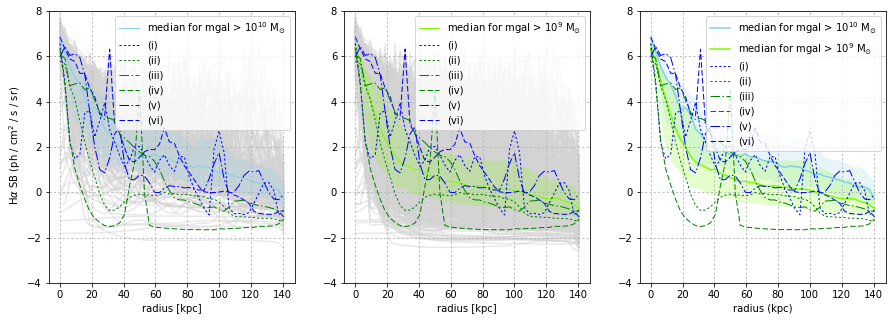

In [50]:
tenandup  = False
nineandup = True
boxsize = 0.2
Mpcperpix = 0.477/1000.*(1.+0.0235) * resolution # 100 Mpc away from us
kpcperpix = 0.477/1000.*(1.+0.0235) * resolution * 1000. # 100 Mpc away from us

def Halphaprofileplot(data,xgal,ygal,boxsize,rhstar=None,linewidth=1,color='black',ax1=None,label='median',method='median',title = ''):
    """
    Input:  data:  Full simulation data (100Mpc box size) from which will measure the radial Halpha profiles
            xgal,ygal: Locations of galaxies from the galaxy catalogue
    """
    if ax1 is None:
        f, (ax1) = plt.subplots(1, 1,figsize=(5,5))
        
    data = data_tuple[0]; xsize = data.shape[0]; ysize = data.shape[1]

    azprofiles=[]; length = len(ygal); title=title
    ax1.set_title(title)
    radius = np.arange(46) * kpcperpix

    for j in range(length):
        minx,miny,maxx,maxy = xgal[j]-boxsize/2.,ygal[j]-boxsize/2.,xgal[j]+boxsize/2.,ygal[j]+boxsize/2.
        xystarts_tiny=[minx,miny]; size_tiny=[boxsize,boxsize] 
        data_tiny=data[minx*xsize/100.:maxx*xsize/100.,miny*ysize/100.:maxy*ysize/100.]
        center, radi = (data_tiny.shape[0]/2,data_tiny.shape[1]/2), 55
        rad = radial_profile(data_tiny, center)
        if len(rad)==46:
            azprofiles.append(rad)
            if method=='none':
                ax1.plot(radius,rad)
            else:
                ax1.plot(radius,rad,color='lightgrey',zorder=1,alpha=0.5)
            if rhstar is not None:
                ax1.plot([rhstar[j],rhstar[j]],[-4,8],color='peachpuff',zorder=1,alpha=0.3)
        else:
            'catch edge cases'
            print "The length of the profile (x,y=%s,%s) is not correct, length: %s"%\
                        (minx+boxsize/2,miny+boxsize/2,len(rad))

    azprofiles = np.array(azprofiles)
    
    ax1.set_ylim(-4,8)
    ax1.set_xlabel('radius [kpc]')
    
    if method=='average':
        meanprofile = np.log10(np.mean(10**(azprofiles), axis=0))
        sigmaprofile = np.log10(np.std(10**(azprofiles), axis=0))
        lowerr  = np.log10( 10**meanprofile - (10**sigmaprofile) ) 
        higherr = np.log10( 10**meanprofile + (10**sigmaprofile) ) 
        ax1.plot(radius,lowerr,color=color,linestyle='--')
        ax1.plot(radius,higherr,color=color,linestyle='--')
        ax1.plot(radius,meanprofile,color=color,linestyle='-') 
        return meanprofile,lowerr,higherr
    if method=='median':
        medianprofile = np.log10(np.median(10**(azprofiles), axis=0))
        p25profile = np.percentile(azprofiles, 25, axis=0)
        p75profile = np.percentile(azprofiles, 75, axis=0)
        ax1.plot(radius,medianprofile,color=color,linestyle='-',label=label,zorder=3,linewidth=linewidth) 
      #  ax1.plot(radius,p25profile,color=color,linestyle='--',label='25 percentile') 
      #  ax1.plot(radius,p75profile,color=color,linestyle='--',label='75 percentile') 
        ax1.fill_between(radius,p25profile, p75profile, facecolor =color,alpha=0.2,zorder=4)
        if rhstar is not None:
            ax1.plot([np.median(rhstar),np.median(rhstar)],[-4,8],color='orange',linewidth=2,zorder=2,alpha=0.5)
        return medianprofile,p25profile,p75profile

def plotindividualprofiles(data,xgal_9andup,ygal_9andup,boxsize,linewidth=1,ax1=None,color10='blue',color9='green',only9=False,only10=False):
    if ax1 is None:
        f, (ax1) = plt.subplots(1, 1,figsize=(5,5))

    nums=['(i)','(ii)','(iii)','(v)','(vi)','(iv)']
    linestyles=[':',':','-.','--','-.','--']
    colours=[color10,color9,color9,color9,color10,color10]
    for j,linestyle,colour in zip([0,1,2,5,3,4],linestyles,colours):
        if only9:
            if colour==color10:
                continue
                
        if only10:
            if colour==color9:
                continue
                
        minx,miny,maxx,maxy = xgal_9andup[j]-boxsize/2.,ygal_9andup[j]-boxsize/2.,xgal_9andup[j]+boxsize/2.,ygal_9andup[j]+boxsize/2.
        xystarts_tiny=[minx,miny]; size_tiny=[boxsize,boxsize] 
        data_tiny=data[minx*xsize/100.:maxx*xsize/100.,miny*ysize/100.:maxy*ysize/100.]
    
        center, radi = (data_tiny.shape[0]/2,data_tiny.shape[1]/2), 55
        rad = radial_profile(data_tiny, center)

        label=r'%s: %.1eM$_{\odot}$, rhstar=%.1fkpc'%(nums[j],mgal_9andup[j],rhstar_9andup[j])
        label='%s'%nums[j]
        
        if nums[j]=='(iii)':
            zorder=5
        else:
            zorder=4
        ax1.plot(np.arange(len(rad))*kpcperpix,rad,label=label,color=colour,linestyle=linestyle,\
                 zorder=zorder,linewidth=linewidth)

f, (ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(15,5))
ax1.grid(linestyle=':')
median_10andup,p25_10andup,p75_10andup=Halphaprofileplot(data,xgal_10andup_all,ygal_10andup_all,boxsize,ax1=ax1,\
                                                         color='skyblue',\
                                                         label = r'median for mgal > 10$^{10}$ M$_{\odot}$')
plotindividualprofiles(data,xgal_9andup,ygal_9andup,boxsize,ax1=ax1)
ax1.legend()
ax1.set_ylabel(r' H$\alpha$ SB (ph / cm$^2$ / s / sr)')

ax2.grid(linestyle=':')
median_9andup,p25_9andup,p75_9andup=Halphaprofileplot(data,xgal_9andup_all,ygal_9andup_all,boxsize,ax1=ax2,\
                                                      color='lawngreen',\
                                                      label = r'median for mgal > 10$^9$ M$_{\odot}$')
plotindividualprofiles(data,xgal_9andup,ygal_9andup,boxsize,ax1=ax2)
ax2.legend()

radius = np.arange(46) * kpcperpix
ax3.plot(radius,median_10andup,color='skyblue',label = r'median for mgal > 10$^{10}$ M$_{\odot}$')
ax3.plot(radius, median_9andup,color='lawngreen',label=r'median for mgal > 10$^9$ M$_{\odot}$')
ax3.fill_between(radius,p25_10andup,p75_10andup,facecolor ='skyblue', alpha=0.2)
ax3.fill_between(radius,p25_9andup, p75_9andup, facecolor ='lawngreen',alpha=0.2)
plotindividualprofiles(data,xgal_9andup,ygal_9andup,boxsize,ax1=ax3)
ax3.set_ylim(-4,8)
ax3.set_xlabel('radius (kpc)')
ax3.grid(linestyle=':')
ax3.legend()


In [51]:

SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 17

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:83: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


The length of the profile (x,y=51.2947463989,0.0101769147441) is not correct, length: 0
The length of the profile (x,y=62.0111694336,99.9482650757) is not correct, length: 51
The length of the profile (x,y=49.5541000366,0.0777019932866) is not correct, length: 0


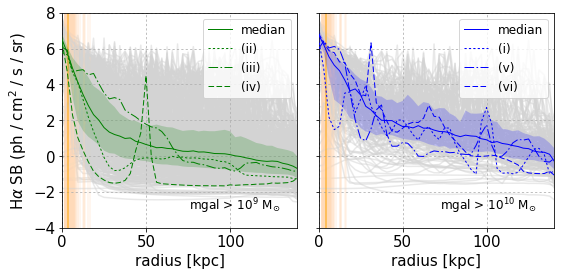

In [52]:
f, (ax1,ax2) = plt.subplots(1, 2,figsize=(8,4))
ax2.grid(linestyle=':')
median_10andup,p25_10andup,p75_10andup=Halphaprofileplot(data,xgal_10andup_all,ygal_10andup_all,boxsize,ax1=ax2,\
                                                         color='blue',rhstar=rhstar_10andup_all,\
                                                         label = 'median')
plotindividualprofiles(data,xgal_9andup,ygal_9andup,boxsize,ax1=ax2,only10=True)
label = r'mgal > 10$^{10}$ M$_{\odot}$'
ax2.legend(loc=1)
ax2.text(130,-3,label,horizontalalignment='right')

ax1.grid(linestyle=':')
median_9andup,p25_9andup,p75_9andup=Halphaprofileplot(data,xgal_9andup_all,ygal_9andup_all,boxsize,ax1=ax1,\
                                                      color='green',rhstar=rhstar_9andup_all,\
                                                      label='median')
label = r'mgal > 10$^9$ M$_{\odot}$'
plotindividualprofiles(data,xgal_9andup,ygal_9andup,boxsize,ax1=ax1,only9=True)
ax1.legend(loc=1)
ax1.text(130,-3,label,horizontalalignment='right')

ax2.set_yticklabels([])
ax2.set_ylabel('')
#ax2.set_yticks([])

ax1.set_ylabel(r'H$\alpha$ SB (ph / cm$^2$ / s / sr)')

xlog=False
if xlog:
    ax1.set_xscale('log')
    ax2.set_xscale('log')

ax2.set_xlim(0,140)    
ax1.set_xlim(0,140)
# set upper xlabels

fig.subplots_adjust( wspace = 0, top=.85)
plt.tight_layout()

if xlog:
    iflog = '_log'
else:
    iflog = ''
plt.savefig('extract_FOV_and_cutout_galaxies_halphaprofiles_v2%s.png'%iflog)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:83: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


The length of the profile (x,y=51.2947463989,0.0101769147441) is not correct, length: 0
The length of the profile (x,y=62.0111694336,99.9482650757) is not correct, length: 51
The length of the profile (x,y=49.5541000366,0.0777019932866) is not correct, length: 0
141.859
189.055
243.555
328.344
452.798
632.73


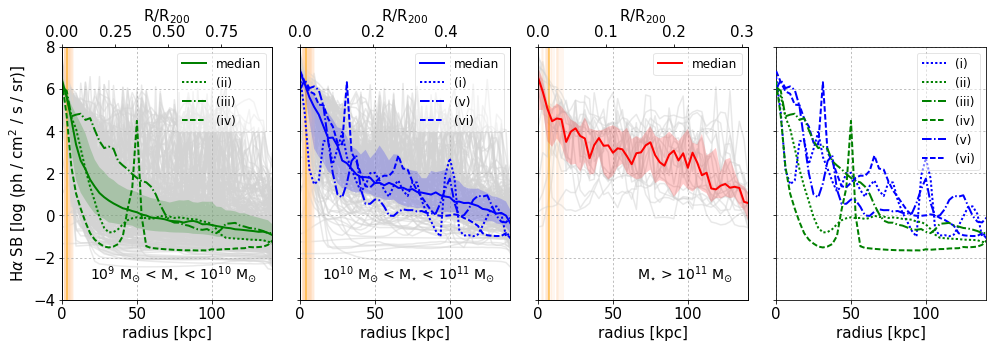

In [53]:
linewidth=2
f, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4,figsize=(14,5))
ax2.grid(linestyle=':')
median_10to11,p25_10to11,p75_10to11=Halphaprofileplot(data,xgal_10to11_all,ygal_10to11_all,boxsize,ax1=ax2,\
                                                         color='blue',label = 'median',rhstar=rhstar_10to11_all,\
                                                         linewidth=linewidth)
plotindividualprofiles(data,xgal_9andup,ygal_9andup,boxsize,ax1=ax2,only10=True,linewidth=linewidth)
title = r'10$^{10}$ M$_{\odot}$ < M$_{\star}$ < 10$^{11}$ M$_{\odot}$'
ax2.legend(loc=1, framealpha=0.5)
#ax2.set_title(title)
ax2.text(130,-3,title,horizontalalignment='right',fontsize=14)

ax1.grid(linestyle=':')
median_9to10,p25_9to10,p75_9to10=Halphaprofileplot(data,xgal_9to10_all,ygal_9to10_all,boxsize,ax1=ax1,\
                                                      color='green',label='median',rhstar=rhstar_9to10_all,\
                                                      linewidth=linewidth)
title = r'10$^9$ M$_{\odot}$ < M$_{\star}$ < 10$^{10}$ M$_{\odot}$'
plotindividualprofiles(data,xgal_9andup,ygal_9andup,boxsize,ax1=ax1,only9=True,linewidth=linewidth)
ax1.legend(loc=1, framealpha=0.5)
#ax1.set_title(title)
ax1.text(130,-3,title,horizontalalignment='right',fontsize=14)

ax3.grid(linestyle=':')
median_11andup,p25_11andup,p75_11andup=Halphaprofileplot(data,xgal_11andup_all,ygal_11andup_all,boxsize,ax1=ax3,\
                                                         color='red',label = 'median',rhstar=rhstar_11andup_all,\
                                                         linewidth=linewidth)
#plotindividualprofiles(data,xgal_9andup,ygal_9andup,boxsize,ax1=ax3)
title = r'M$_{\star}$ > 10$^{11}$ M$_{\odot}$'
ax3.legend(loc=1, framealpha=0.5)
#ax3.set_title(title)
ax3.text(130,-3,title,horizontalalignment='right',fontsize=14)

ax4.grid(linestyle=':')
plotindividualprofiles(data,xgal_9andup,ygal_9andup,boxsize,ax1=ax4,linewidth=linewidth)
title = ''
ax4.legend(loc=1, framealpha=0.5)
ax4.set_title(title)
ax4.set_ylim(-4,8)
ax4.set_xlabel('radius [kpc]')

ax4.set_yticklabels([])
ax4.set_ylabel('')
ax2.set_yticklabels([])
ax2.set_ylabel('')
#ax2.set_yticks([])
ax3.set_yticklabels([])
ax3.set_ylabel('')

ax1.set_xlim(0,140)
ax2.set_xlim(0,140)
ax3.set_xlim(0,140)
ax4.set_xlim(0,140)
ax1.set_ylabel(r'H$\alpha$ SB [log (ph / cm$^2$ / s / sr)]')

ax5 = ax1.twiny()
ax5.set_xlabel('R/R$_{200}$')
ax5.set_xlim(0,140/np.median(R200_9to10_all))
print np.median(R200_9to10_all)
print np.median(RTopHat_9to10_all)

ax6 = ax2.twiny()
ax6.set_xlabel('R/R$_{200}$')
ax6.set_xlim(0,140/np.median(R200_10to11_all))
print np.median(R200_10to11_all)
print np.median(RTopHat_10to11_all)

ax7 = ax3.twiny()
ax7.set_xlabel('R/R$_{200}$')
ax7.set_xlim(0,140/np.median(R200_11andup_all))
print np.median(R200_11andup_all)
print np.median(RTopHat_11andup_all)

fig.subplots_adjust( wspace = 0, top=.85)
plt.tight_layout()
plt.savefig('extract_FOV_and_cutout_galaxies_halphaprofiles_fourplots_v3.png')

In [54]:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

#SMALL_SIZE = 12
#MEDIUM_SIZE = 14
#BIGGER_SIZE = 17

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


The length of the profile (x,y=51.2947463989,0.0101769147441) is not correct, length: 0
The length of the profile (x,y=62.0111694336,99.9482650757) is not correct, length: 51
The length of the profile (x,y=49.5541000366,0.0777019932866) is not correct, length: 0


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:83: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


The inner CGM for the first plot is: 3.0875
The inner CGM for the second plot is: 3.93606
The inner CGM for the third plot is: 7.13555
15.4374802113
19.6803116798
35.677754879
141.859
189.055
243.555
328.344
452.798
632.73
1405.64868991 1 / (cm2 s sr)
7.11415311078e-27 erg sr / arcsec2 7.11415311078e-15 erg sr / arcsec2


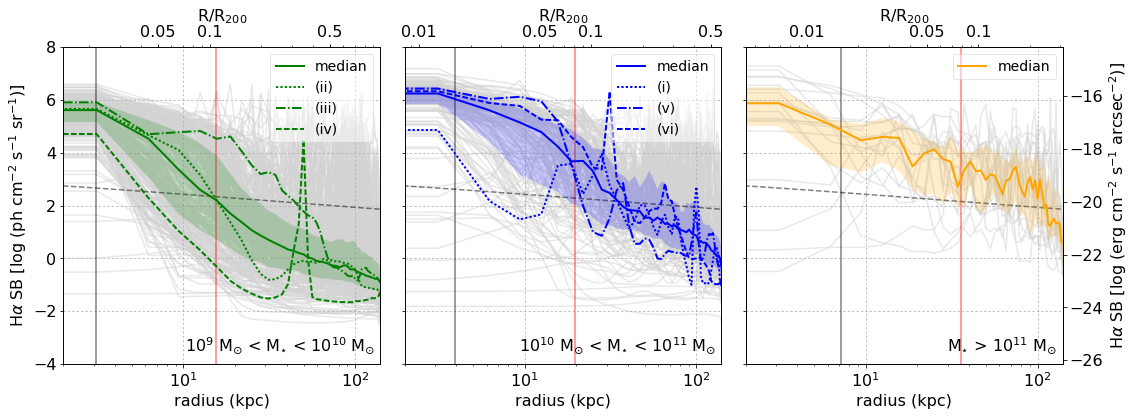

In [63]:
linewidth=2
f, (ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(16,6))
ax1.grid(linestyle=':')
median_9to10,p25_9to10,p75_9to10=Halphaprofileplot(data,xgal_9to10_all,ygal_9to10_all,boxsize,ax1=ax1,\
                                                      color='green',label='median',linewidth=linewidth)
title = r'10$^9$ M$_{\odot}$ < M$_{\star}$ < 10$^{10}$ M$_{\odot}$'
plotindividualprofiles(data,xgal_9andup,ygal_9andup,boxsize,ax1=ax1,only9=True,linewidth=linewidth)
ax1.legend(loc=1, framealpha=0.5)
#ax1.set_title(title)
ax1.text(130,-3.5,title,horizontalalignment='right',fontsize=16)

ax2.grid(linestyle=':')
median_10to11,p25_10to11,p75_10to11=Halphaprofileplot(data,xgal_10to11_all,ygal_10to11_all,boxsize,ax1=ax2,\
                                                         color='blue',label = 'median',linewidth=linewidth)
plotindividualprofiles(data,xgal_9andup,ygal_9andup,boxsize,ax1=ax2,only10=True,linewidth=linewidth)
title = r'10$^{10}$ M$_{\odot}$ < M$_{\star}$ < 10$^{11}$ M$_{\odot}$'
ax2.legend(loc=1, framealpha=0.5)
#ax2.set_title(title)
ax2.text(130,-3.5,title,horizontalalignment='right',fontsize=16)

ax3.grid(linestyle=':')
median_11andup,p25_11andup,p75_11andup=Halphaprofileplot(data,xgal_11andup_all,ygal_11andup_all,boxsize,ax1=ax3,\
                                                         color='orange',label = 'median',linewidth=linewidth)
#plotindividualprofiles(data,xgal_9andup,ygal_9andup,boxsize,ax1=ax3)
title = r'M$_{\star}$ > 10$^{11}$ M$_{\odot}$'
ax3.legend(loc=1, framealpha=0.5)
#ax3.set_title(title)
ax3.text(130,-3.5,title,horizontalalignment='right',fontsize=16)

ax2.set_yticklabels([])
ax2.set_ylabel('')
#ax2.set_yticks([])
ax3.set_yticklabels([])
ax3.set_ylabel('')

reff_lw = 1.5
print 'The inner CGM for the first plot is: %s'%np.median(rhstar_9to10_all)
print 'The inner CGM for the second plot is: %s'%np.median(rhstar_10to11_all)
print 'The inner CGM for the third plot is: %s'%np.median(rhstar_11andup_all)
ax1.plot([np.median(rhstar_9to10_all),np.median(rhstar_9to10_all)],[-4,8],color='black',linewidth=reff_lw,zorder=2,alpha=0.5)
ax2.plot([np.median(rhstar_10to11_all),np.median(rhstar_10to11_all)],[-4,8],color='black',linewidth=reff_lw,zorder=2,alpha=0.5)
ax3.plot([np.median(rhstar_11andup_all),np.median(rhstar_11andup_all)],[-4,8],color='black',linewidth=reff_lw,zorder=2,alpha=0.5)

ax1.plot([5*np.median(rhstar_9to10_all),5*np.median(rhstar_9to10_all)],[-4,8],color='red',linewidth=reff_lw,zorder=2,alpha=0.5)
ax2.plot([5*np.median(rhstar_10to11_all),5*np.median(rhstar_10to11_all)],[-4,8],color='red',linewidth=reff_lw,zorder=2,alpha=0.5)
ax3.plot([5*np.median(rhstar_11andup_all),5*np.median(rhstar_11andup_all)],[-4,8],color='red',linewidth=reff_lw,zorder=2,alpha=0.5)

print 5*np.median(rhstar_9to10_all)
print 5*np.median(rhstar_10to11_all)
print 5*np.median(rhstar_11andup_all)

ax5 = ax1.twiny()
ax6 = ax2.twiny()
ax7 = ax3.twiny()

loglog = True
if loglog:
    ax1.set_xscale('log')
    ax2.set_xscale('log')
    ax3.set_xscale('log')
    ax5.set_xscale('log')
    ax6.set_xscale('log')
    ax7.set_xscale('log')

ax1.set_xlim(2.,140)
ax2.set_xlim(2.,140)
ax3.set_xlim(2.,140)
ax1.set_ylabel(r'H$\alpha$ SB [log (ph cm$^{-2}$ s$^{-1}$ sr$^{-1}$)]')

ax5.set_xlabel('R/R$_{200}$')
ax5.set_xlim(2./np.median(R200_9to10_all),140./np.median(R200_9to10_all))
if loglog:
    ax5.set_xticks([0.05,0.1,0.5])
    ax5.set_xticklabels([0.05,0.1,0.5])
print np.median(R200_9to10_all)
print np.median(RTopHat_9to10_all)

ax6.set_xlabel('R/R$_{200}$')
ax6.set_xlim(2./np.median(R200_10to11_all),140./np.median(R200_10to11_all))
if loglog:
    ax6.set_xticks([0.01,0.05,0.1,0.5])
    ax6.set_xticklabels([0.01,0.05,0.1,0.5])
print np.median(R200_10to11_all)
print np.median(RTopHat_10to11_all)

ax7.set_xlabel('R/R$_{200}$')
ax7.set_xlim(2./np.median(R200_11andup_all),140./np.median(R200_11andup_all))
if loglog:
    ax7.set_xticks([0.01,0.05,0.1])
    ax7.set_xticklabels([0.01,0.05,0.1])
print np.median(R200_11andup_all)
print np.median(RTopHat_11andup_all)

if loglog:
    for ax in [ax1,ax2,ax3]:
        ax.set_xlabel(r'radius (kpc)')
    for ax in [ax5,ax6,ax7]:
        ax.set_xlabel(r'R/R$_{200}$')
        
#SB_cgs = 10**-22 *u.erg / u.arcsec**2 / u.cm**2 / u.s
def getSB_ph(SB_cgs,photon_wavelength=656.3e-9*u.m):
    return SB_cgs * photon_wavelength/(const.h.to('erg s') * const.c.to('m/s')) * (206265.*u.arcsec)**2/u.sr
def getSB_cgs(SB_ph,photon_wavelength=656.3e-9*u.m):
    return SB_ph / (photon_wavelength/(const.h.to('erg s') * const.c.to('m/s')) * (206265.*u.arcsec)**2/u.sr)
print getSB_ph(10**-19 *u.erg / u.arcsec**2 / u.cm**2 / u.s)

ax8 = ax3.twinx()
ax8.set_ylabel(r'H$\alpha$ SB [log (erg cm$^{-2}$ s$^{-1}$ arcsec$^{-2}$)]')
ax8.set_ylim(np.log10(getSB_cgs(10**-4).value),np.log10(getSB_cgs(10**8).value))
print getSB_cgs(10**-4),getSB_cgs(10**8)

# Read in the surface brightness limits from a text file: They were calculated in SignalToNoise_azimuthalaveraging_limits
ff = open('../SignalToNoise_azimuthalaveraging_limits_sigma1.txt','r')
readradius = []
readSB = []
for line in ff:
    if line[0]!='#'and len(line)>5:
        tmp = line.split()
        readradius.append(tmp[0])
        readSB.append(tmp[1])
ff.close()
readradius = np.array(readradius,'d')
readSB = np.array(readSB,'d')

ax1.plot(readradius,np.log10(readSB),'k--',alpha=0.5)
ax2.plot(readradius,np.log10(readSB),'k--',alpha=0.5)
ax3.plot(readradius,np.log10(readSB),'k--',alpha=0.5)


fig.subplots_adjust( wspace = 0, top=.95)
plt.tight_layout()

if loglog:
    printlog = '_log'
else:
    printlog = ''
plt.savefig('extract_FOV_and_cutout_galaxies_halphaprofiles_selectingbetweenmass_v4%s_1sigmalim.png'%printlog)

In [119]:
median_9to10
print np.arange(len(rad))*kpcperpix
# 15.4374802113 -->  index 5
# 19.6803116798 -->  index 6 and 7
# 35.677754879  -->  index 11 and 12
# 50            -->  index 16
# 100           -->  index 32

print 10**median_9to10[5]

print (np.mean([10**median_10to11[6],10**median_10to11[7]]))

print (np.mean([10**median_11andup[10],10**median_11andup[11],10**median_11andup[12],10**median_11andup[13]]))

print (np.mean([10**median_11andup[15],10**median_11andup[16],10**median_11andup[17]]))
print (np.mean([10**median_11andup[31],10**median_11andup[32],10**median_11andup[33]]))

[   0.       3.125    6.25     9.375   12.5     15.625   18.75    21.875
   25.      28.125   31.25    34.375   37.5     40.625   43.75    46.875
   50.      53.125   56.25    59.375   62.5     65.625   68.75    71.875
   75.      78.125   81.25    84.375   87.5     90.625   93.75    96.875
  100.     103.125  106.25   109.375  112.5    115.625  118.75   121.875
  125.     128.125  131.25   134.375  137.5    140.625]
155.820767713
4803.33478321
2962.3990999
1521.43078533
671.82297511


/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:24: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:83: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


The length of the profile (x,y=49.5541000366,0.0777019932866) is not correct, length: 0
The length of the profile (x,y=51.2947463989,0.0101769147441) is not correct, length: 0
The length of the profile (x,y=62.0111694336,99.9482650757) is not correct, length: 51
7.11415311078e-27 erg sr / arcsec2 7.11415311078e-15 erg sr / arcsec2


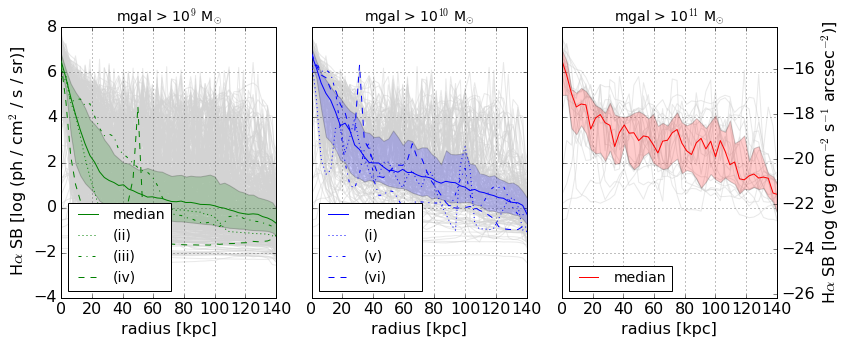

In [178]:
f, (ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(12,5))
ax2.grid(linestyle=':')
median_10andup,p25_10andup,p75_10andup=Halphaprofileplot(data,xgal_10andup_all,ygal_10andup_all,boxsize,ax1=ax2,\
                                                         color='blue',label = 'median')
plotindividualprofiles(data,xgal_9andup,ygal_9andup,boxsize,ax1=ax2,only10=True)
title = r'mgal > 10$^{10}$ M$_{\odot}$'
ax2.legend(loc=3)
ax2.set_title(title)

ax1.grid(linestyle=':')
median_9andup,p25_9andup,p75_9andup=Halphaprofileplot(data,xgal_9andup_all,ygal_9andup_all,boxsize,ax1=ax1,\
                                                      color='green',label='median')
title = r'mgal > 10$^9$ M$_{\odot}$'
plotindividualprofiles(data,xgal_9andup,ygal_9andup,boxsize,ax1=ax1,only9=True)
ax1.legend(loc=3)
ax1.set_title(title)

ax3.grid(linestyle=':')
median_11andup,p25_11andup,p75_11andup=Halphaprofileplot(data,xgal_11andup_all,ygal_11andup_all,boxsize,ax1=ax3,\
                                                         color='red',label = 'median')
#plotindividualprofiles(data,xgal_9andup,ygal_9andup,boxsize,ax1=ax3)
title = r'mgal > 10$^{11}$ M$_{\odot}$'
ax3.legend(loc=3)
ax3.set_title(title)

ax2.set_yticklabels([])
ax2.set_ylabel('')
#ax2.set_yticks([])
ax3.set_yticklabels([])
ax3.set_ylabel('')

ax1.set_xlim(0,140)
ax2.set_xlim(0,140)
ax3.set_xlim(0,140)
ax1.set_ylabel(r' H$\alpha$ SB [log (ph / cm$^2$ / s / sr)]')

#ax1.set_xscale('symlog')
#ax2.set_xscale('symlog')
#ax3.set_xscale('symlog')

#SB_cgs = 10**-22 *u.erg / u.arcsec**2 / u.cm**2 / u.s
def getSB_ph(SB_cgs,photon_wavelength=656.3e-9*u.m):
    return SB_cgs * photon_wavelength/(const.h.to('erg s') * const.c.to('m/s')) * (206265.*u.arcsec)**2/u.sr
def getSB_cgs(SB_ph,photon_wavelength=656.3e-9*u.m):
    return SB_ph / (photon_wavelength/(const.h.to('erg s') * const.c.to('m/s')) * (206265.*u.arcsec)**2/u.sr)

ax8 = ax3.twinx()
ax8.set_ylabel(r'H$\alpha$ SB [log (erg cm$^{-2}$ s$^{-1}$ arcsec$^{-2}$)]')
ax8.set_ylim(np.log10(getSB_cgs(10**-4).value),np.log10(getSB_cgs(10**8).value))
print getSB_cgs(10**-4),getSB_cgs(10**8)

fig.subplots_adjust( wspace = 0, top=.85)
plt.tight_layout()
plt.savefig('extract_FOV_and_cutout_galaxies_halphaprofiles_with11_v2_log.png')

49.20625 51.79375 12.6375 14.3625 10.0 15.0


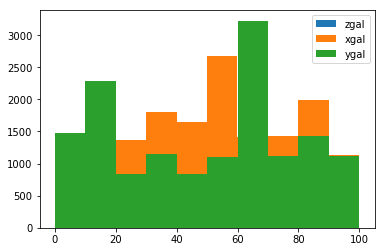

In [115]:
#xmin,xmax,ymin,ymax,zmin,zmax = xystarts1_500[0],xystarts1_500[0]+size1_500[0],xystarts1_500[1],xystarts1_500[1]+size1_500[1],10.,15.
#xgal,ygal,zgal,mgal,rhgas,rhstar = searchgals(xmin,xmax,ymin,ymax,zmin,zmax,True,False) # from mask_galaxies

plt.hist(zgal,label='zgal')
plt.hist(xgal,label='xgal')
plt.hist(ygal,label='ygal')
plt.legend()

print xmin,xmax,ymin,ymax,zmin,zmax

19


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


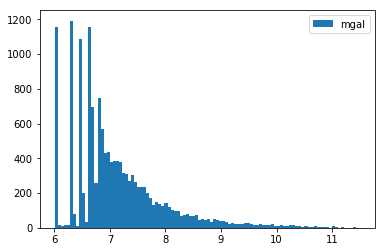

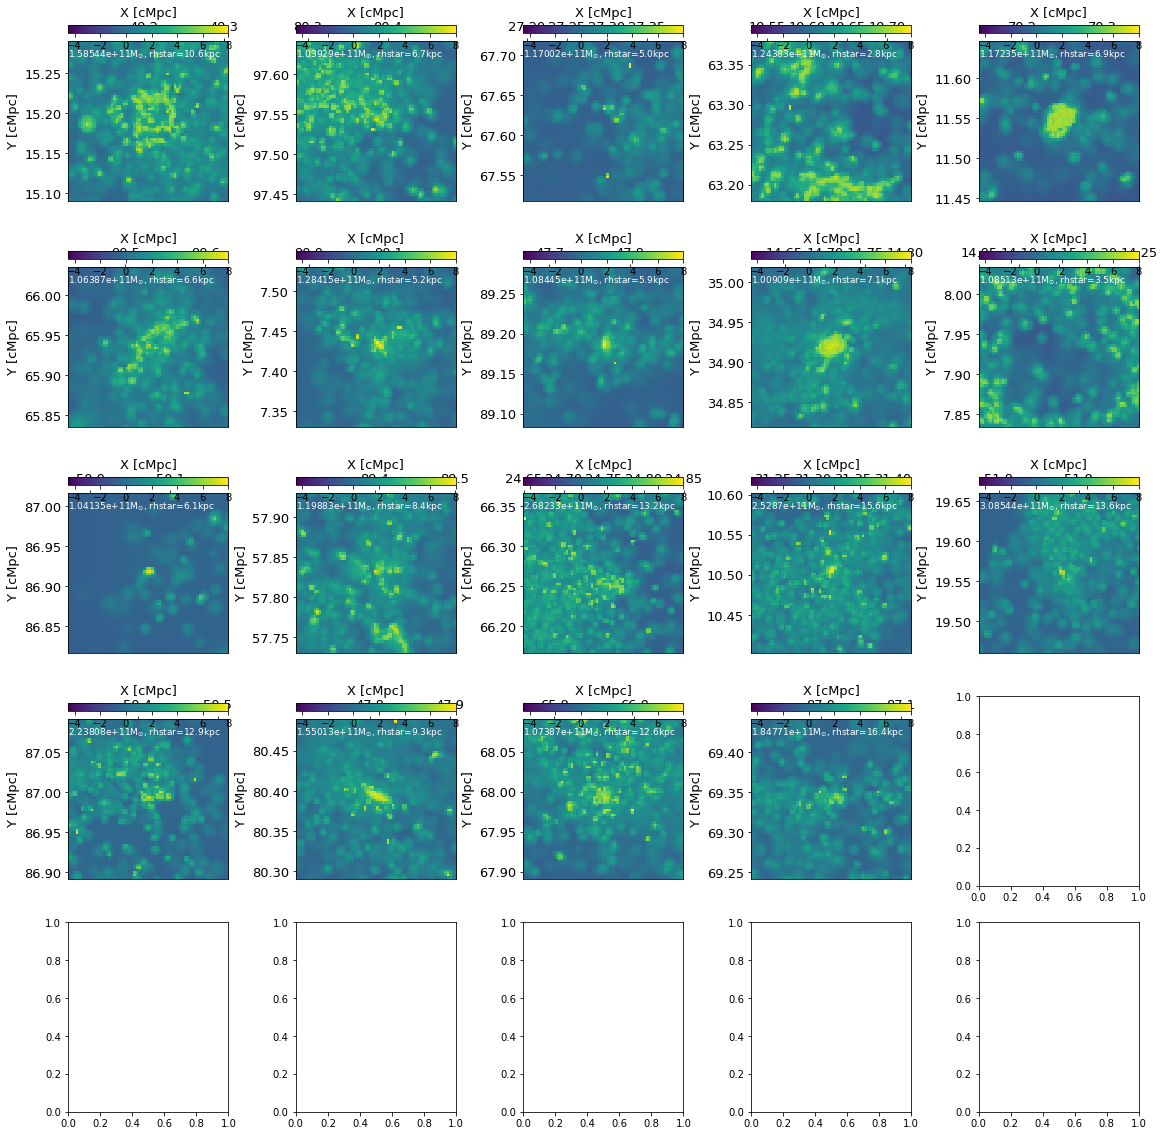

In [122]:
plt.hist(np.log10(mgal),label='mgal',bins=100);
plt.legend()

condition_11andup = np.array( (mgal > 10**11) )#& (rhstar*5. > (Mpcperpix*1000.)) & (rhgas*5. > (Mpcperpix*1000.)) )
ii_11andup = np.array(np.where(condition_11andup)[0]) 
xgal_11andup     = np.array(xgal[ii_11andup])
ygal_11andup     = np.array(ygal[ii_11andup])
mgal_11andup     = np.array(mgal[ii_11andup])
rhstar_11andup   = np.array(rhstar[ii_11andup])
print len(xgal_11andup)

f, axarr = plt.subplots(5, 5,figsize=(16,16))

for j in range(19):
    
    minx,miny,maxx,maxy = xgal_11andup[j]-boxsize/2.,ygal_11andup[j]-boxsize/2.,xgal_11andup[j]+boxsize/2.,ygal_11andup[j]+boxsize/2.
    xystarts_tiny=[minx,miny]; size_tiny=[boxsize,boxsize] 
    data_tiny=data[minx*xsize/100.:maxx*xsize/100.,miny*ysize/100.:maxy*ysize/100.]

  #  data_tiny, xystarts_tiny, size_tiny = extractFOV(data_tuple,resolution,distance,\
  #                                                   x_center=xgal_11andup[j],y_center=ygal_11andup[j],\
  #                                                   x_angFOV=1000.,y_angFOV=1000.)
    
    #plotdata(data_tiny.T,ax=axarr[j/5,j%5],colorbar=True,\
    #         label=r'%sM$_{\odot}$, rhstar=%.1fkpc'%(mgal_10andup[j],rhstar_10andup[j]))
    pltimg(data_tiny,axarr[j/5,j%5],xystarts_tiny,size_tiny,\
           label=r'%sM$_{\odot}$, rhstar=%.1fkpc'%(mgal_11andup[j],rhstar_11andup[j]))

    
plt.tight_layout()


In [82]:
#Mpcperpix = 0.237/1000.*(1.+0.0115) * resolution
Mpcperpix = 0.477/1000.*(1.+0.0235) * resolution

# Condition (use bitwise "&" and not boolean "and")
condition_8to9 = np.array(   
                              (mgal > 10**8) & (mgal < 10**9)
                         )
condition_9to10 = np.array(  
                               (mgal > 10**9) & (mgal < 10**10)
                          )
condition_10andup = np.array(    
                                 (mgal > 10**10) 
                            )
ii_8to9 = np.array(np.where(condition_8to9)[0]) 
ii_9to10 = np.array(np.where(condition_9to10)[0]) 
ii_10andup = np.array(np.where(condition_10andup)[0]) 

In [83]:
print len(ii_8to9), len(ii_9to10), len(ii_10andup)
xgal_10andup     = np.array(xgal[ii_10andup])
ygal_10andup     = np.array(ygal[ii_10andup])
mgal_10andup     = np.array(mgal[ii_10andup])
rhstar_10andup   = np.array(rhstar[ii_10andup])
sfr_10andup      = np.array(sfr[ii_10andup])
len(ygal_10andup)

134 39 23


23

In [84]:
len(xgal)

1505

The type of size is <type 'list'>


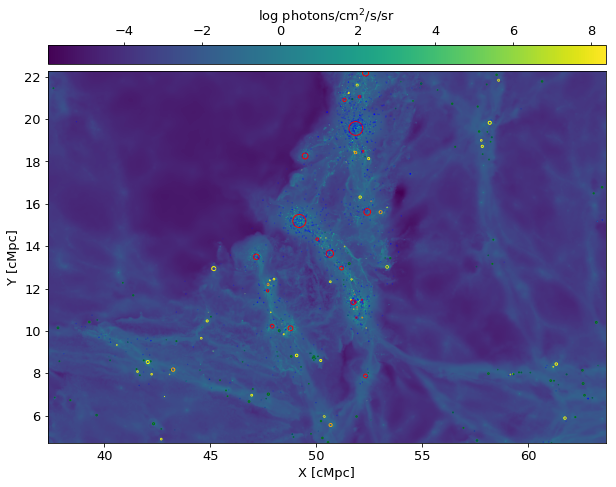

In [85]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
get_halpha_SB.makemap(FOV1_500,size1_500,ax1,xystarts = xystarts1_500)

def plotgals(xgal,ygal,rhgas,rhstar,mgal,ax1,verbose):
    for i in range(len(xgal)):
        colour = 'green'
        if mgal[i]>10**8:
            colour = 'yellow'
        if mgal[i]>10**9:
            colour = 'orange'
        if mgal[i]>10**10:
            colour = 'red'
        circle1 = plt.Circle((xgal[i],ygal[i]), radius=rhgas[i]/1000., color=colour,fill=False)
        ax1.add_artist(circle1)
        circle1 = plt.Circle((xgal[i],ygal[i]), radius=rhstar[i]/1000., color='blue',fill=False)
        ax1.add_artist(circle1)
       # if verbose:
       #     Mpcperpix = 0.237/1000.*(1.+0.0115) * 100.
       #     Mpcperpix = 0.477/1000.*(1.+0.0235) * resolution 
       #     if (rhstar[i]*5.) > (Mpcperpix*1000.) and (rhgas[i]*5.) > (Mpcperpix*1000.):
       #         print("5*rhstar, %.1f, is greater than %s kpc, and has galaxy mass of %s, and a 5*rhgas of %.1f."%\
       #               ((rhstar[i]*5.),(Mpcperpix*1000.),mgal[i],(rhgas[i]*5.)))
       #         circle1 = plt.Circle((xgal[i],ygal[i]), radius=rhstar[i]/1000.*5., color='purple',fill=False)
       #         ax1.add_artist(circle1)

plotgals(xgal,ygal,rhgas,rhstar,mgal,ax1,verbose)

In [86]:
def pltimg(data_FOV,ax,xystarts,size,label=None,colmap = 'viridis'):
    ax.patch.set_facecolor(cm.get_cmap(colmap)(0.)) # sets background color to lowest color map value
    img = ax.imshow(data_FOV.T,extent=(xystarts[0],xystarts[0]+size[0],xystarts[1],xystarts[1]+size[1]),\
                    origin='lower', cmap=cm.get_cmap(colmap),interpolation='nearest')
    div = axgrid.make_axes_locatable(ax)
    cax = div.append_axes("top",size="5%",pad=0.1)
    cbar = plt.colorbar(img, cax=cax,orientation='horizontal')
    if label is not None:
        ax.text(0.0,0.9,label,transform=ax.transAxes,color='white')


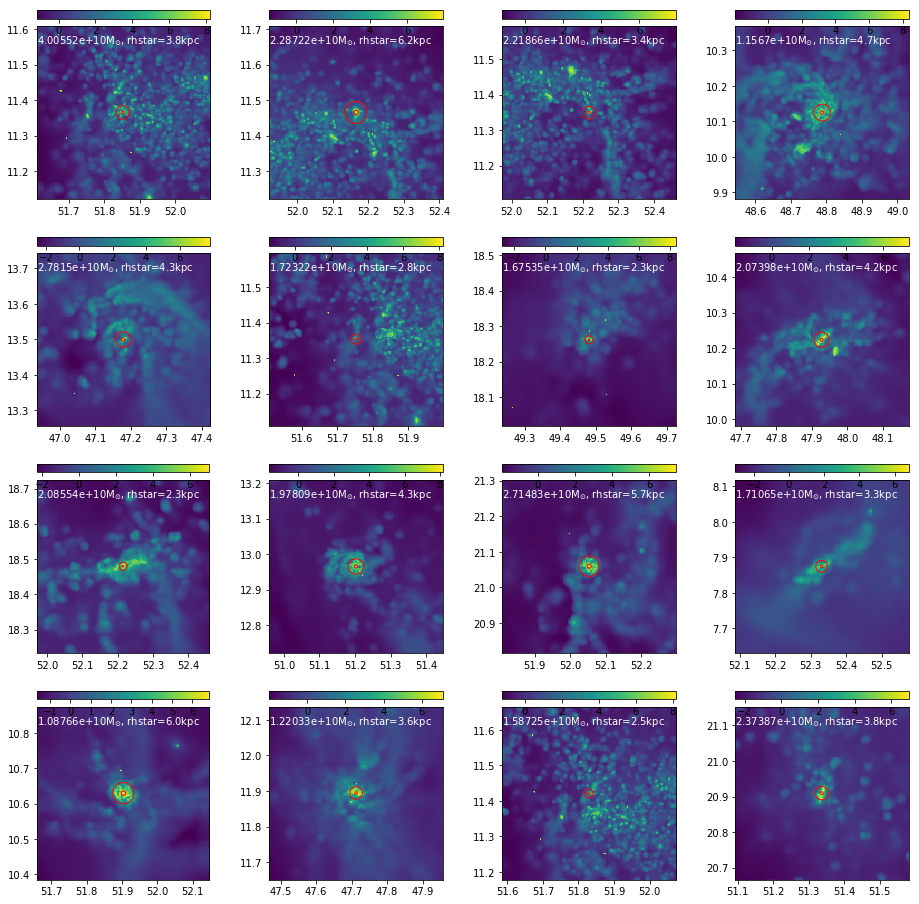

In [87]:
f, axarr = plt.subplots(4, 4,figsize=(16,16))

for j in range(16):
    data_tiny, xystarts_tiny, size_tiny = extractFOV(data_tuple,resolution,distance,\
                                                     x_center=xgal_10andup[j],y_center=ygal_10andup[j],\
                                                     x_angFOV=1000.,y_angFOV=1000.)
    pltimg(data_tiny,axarr[j/4,j%4],xystarts_tiny,size_tiny,\
           label=r'%sM$_{\odot}$, rhstar=%.1fkpc'%(mgal_10andup[j],rhstar_10andup[j]))
    
    circle1 = plt.Circle((xgal_10andup[j],ygal_10andup[j]), radius=rhstar_10andup[j]/1000., color='red',fill=False)
    axarr[j/4,j%4].add_artist(circle1)
    
    circle1 = plt.Circle((xgal_10andup[j],ygal_10andup[j]), radius=rhstar_10andup[j]/1000.*5., color='red',fill=False)
    axarr[j/4,j%4].add_artist(circle1)


In [65]:
#%run 'mask_galaxies.ipynb'

import eagleSqlTools as sql
    
mySim = ('RefL0100N1504',100.)
con   = sql.connect("dlokhorst",password="mxdPB54Y")  


myQuery  = "SELECT \
                SH.StarFormationRate as SFR, \
                SH.CentreOfPotential_x, \
                SH.CentreOfPotential_y, \
                SH.CentreOfPotential_z, \
                SH.SubGroupNumber, \
                SH.MassType_Star, \
                SH.HalfMassProjRad_Gas, \
                SH.HalfMassProjRad_Star, \
                FOF.Group_R_Crit200 as R200, \
                FOF.GroupCentreOfPotential_x as fof_x , \
                FOF.GroupCentreOfPotential_y as fof_y , \
                FOF.GroupCentreOfPotential_z as fof_z , \
                FOF.GroupMass as fof_mass , \
                square(SH.CentreOfPotential_x -FOF.GroupCentreOfPotential_x) + \
                    square(SH.CentreOfPotential_y -FOF.GroupCentreOfPotential_y) + \
                    square(SH.CentreOfPotential_z -FOF.GroupCentreOfPotential_z) as dist \
            FROM \
                %s_SubHalo as SH, \
                %s_FOF as FOF \
            WHERE \
                SH.SnapNum = 28 and \
                SH.CentreOfPotential_x >= %s and \
                SH.CentreOfPotential_x <= %s and \
                SH.CentreOfPotential_y >= %s and \
                SH.CentreOfPotential_y <= %s and \
                SH.CentreOfPotential_z >= %s and \
                SH.CentreOfPotential_z <= %s and \
                SH.MassType_Star > 1.0e8 \
                and FOF.SnapNum = SH.SnapNum \
                and FOF.GroupID = SH.GroupID"%('RefL0100N1504','RefL0100N1504',xmin,xmax,ymin,ymax,zmin,zmax)
zmin=10;zmax=15
myQuery  =  " SELECT \
                SH.StarFormationRate as SFR, \
                SH.CentreOfPotential_x as sh_x , \
                SH.CentreOfPotential_y as sh_y , \
                SH.CentreOfPotential_z as sh_z , \
                SH.SubGroupNumber, \
                SH.HalfMassProjRad_Gas, \
                SH.HalfMassProjRad_Star, \
                FOF.Group_R_Crit200 as R200, \
                FOF.Group_R_TopHat200 as RTopHat, \
                FOF.Group_M_Crit200 as M200, \
                FOF.Group_M_TopHat200 as MTopHat, \
                FOF.GroupCentreOfPotential_x as fof_x , \
                FOF.GroupCentreOfPotential_y as fof_y , \
                FOF.GroupCentreOfPotential_z as fof_z , \
                SH.MassType_Star as mstar , \
                FOF.GroupMass as fof_mass , \
                square(SH.CentreOfPotential_x -FOF.GroupCentreOfPotential_x) + \
                    square(SH.CentreOfPotential_y -FOF.GroupCentreOfPotential_y) + \
                    square(SH.CentreOfPotential_z -FOF.GroupCentreOfPotential_z) as dist \
            FROM \
                RefL0100N1504_Subhalo as SH, \
                RefL0100N1504_FOF as FOF \
            WHERE \
                SH.MassType_Star > 1.0e10\
                and SH.SnapNum = 28 \
                and SH.CentreOfPotential_z >= 10 \
                and SH.CentreOfPotential_z <= 15 \
                and FOF.SnapNum = SH.SnapNum \
                and FOF.GroupID = SH.GroupID"

#"SELECT \
#                SH.GalaxyID, \
#                SH.StarFormationRate as SFR, \
#                SH.CentreOfPotential_x, \
#                SH.CentreOfPotential_y, \
#                SH.CentreOfPotential_z, \
#                SH.SubGroupNumber, \
#                SH.MassType_Star, \
#                SH.HalfMassProjRad_Gas, \
#                SH.HalfMassProjRad_Star, \
#                FOF.Group_R_Crit200 as R200 \
#            FROM \
#                %s_SubHalo as SH, \
#                %s_FOF as FOF \
#            WHERE \
#                SH.SnapNum = 28 and \
#                SH.CentreOfPotential_x >= %s and \
#                SH.CentreOfPotential_x <= %s and \
#                SH.CentreOfPotential_y >= %s and \
#                SH.CentreOfPotential_y <= %s and \
#                SH.CentreOfPotential_z >= %s and \
#                SH.CentreOfPotential_z <= %s and \
#                SH.MassType_Star > 0 "%('RefL0100N1504','RefL0100N1504',xmin,xmax,ymin,ymax,zmin,zmax)
# 

                #  and \
              #  SH.StarFormationRate > 0.00001 

if verbose:
    print myQuery
    
myData = sql.execute_query(con,myQuery)

    #sfr  = myData['SFR'][:]
    #xgal = myData['CentreOfPotential_x'][:]   # cMpc
    #ygal = myData['CentreOfPotential_y'][:]   # cMpc
    ##z = myData['CentreOfMass_z'][:]
    #mgal = myData['MassType_Star'][:]         # M_solar
    #rhgas = myData['HalfMassProjRad_Gas'][:]  # pkpc
    #rhstar= myData['HalfMassProjRad_Star'][:] # pkpc
    #R200 = myData['R200'][:]
    
   # return xgal,ygal,mgal,rhgas,rhstar,sfr,R200

 SELECT                 SH.StarFormationRate as SFR,                 SH.CentreOfPotential_x as sh_x ,                 SH.CentreOfPotential_y as sh_y ,                 SH.CentreOfPotential_z as sh_z ,                 SH.SubGroupNumber,                 SH.HalfMassProjRad_Gas,                 SH.HalfMassProjRad_Star,                 FOF.Group_R_Crit200 as R200,                 FOF.Group_R_TopHat200 as RTopHat,                 FOF.Group_M_Crit200 as M200,                 FOF.Group_M_TopHat200 as MTopHat,                 FOF.GroupCentreOfPotential_x as fof_x ,                 FOF.GroupCentreOfPotential_y as fof_y ,                 FOF.GroupCentreOfPotential_z as fof_z ,                 SH.MassType_Star as mstar ,                 FOF.GroupMass as fof_mass ,                 square(SH.CentreOfPotential_x -FOF.GroupCentreOfPotential_x) +                     square(SH.CentreOfPotential_y -FOF.GroupCentreOfPotential_y) +                     square(SH.CentreOfPotential_z -FOF.GroupCentreOfPotentia

In [68]:
xgal_sh = myData['sh_x'][:]   # cMpc
print len(xgal_sh)

xgal_fof = myData['fof_x'][:]   # cMpc
print len(xgal_fof)

172
172
